## データ準備

In [1]:
from sklearn import datasets

features, labels = datasets.load_boston(return_X_y =True)

In [2]:
from sklearn import model_selection

train_features, test_features, train_labels, test_labels = model_selection.train_test_split(features, labels, test_size=0.2)

In [3]:
print(train_features.shape)
print(train_labels.shape)
print(test_features.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
import xgboost as xgb

trains = xgb.DMatrix(train_features, label=train_labels)
tests = xgb.DMatrix(test_features, label=test_labels)

## ハイパーパラメータ最適化

In [5]:
base_params = {
    'booster': 'gbtree',
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
}

watchlist = [(trains, 'train'), (tests, 'eval')]

In [6]:
import optuna
from sklearn.metrics import r2_score
import copy

tmp_params = copy.deepcopy(base_params)

def optimizer(trial):
#     booster = trial.suggest_categorical('booster', ['gbtree', 'dart', 'gblinear'])
    eta = trial.suggest_uniform('eta', 0.01, 0.3)
    max_depth = trial.suggest_int('max_depth', 4, 15)
    __lambda = trial.suggest_uniform('lambda', 0.7, 2)

#     params['booster'] = booster
    tmp_params['eta'] = eta
    tmp_params['max_depth'] = max_depth
    tmp_params['lambda'] = __lambda

    model = xgb.train(tmp_params, trains, num_boost_round=50)
    predicts = model.predict(tests)

    r2 = r2_score(test_labels, predicts)
    print(f'#{trial.number}, Result: {r2}, {trial.params}')

    return r2

In [7]:
study = optuna.create_study(direction='maximize')
study.optimize(optimizer, n_trials=500)

#0, Result: 0.06732942501480954, {'eta': 0.020799548315897275, 'max_depth': 8, 'lambda': 0.8428474495156564}


[I 2019-12-15 00:21:06,078] Finished trial#0 resulted in value: 0.06732942501480954. Current best value is 0.06732942501480954 with parameters: {'eta': 0.020799548315897275, 'max_depth': 8, 'lambda': 0.8428474495156564}.


#1, Result: -1.3591279101065639, {'eta': 0.011027236609529522, 'max_depth': 13, 'lambda': 1.4249262510147633}


[I 2019-12-15 00:21:06,166] Finished trial#1 resulted in value: -1.3591279101065639. Current best value is 0.06732942501480954 with parameters: {'eta': 0.020799548315897275, 'max_depth': 8, 'lambda': 0.8428474495156564}.


#2, Result: 0.1594543010113716, {'eta': 0.022286677479687607, 'max_depth': 12, 'lambda': 1.748914000712834}


[I 2019-12-15 00:21:06,265] Finished trial#2 resulted in value: 0.1594543010113716. Current best value is 0.1594543010113716 with parameters: {'eta': 0.022286677479687607, 'max_depth': 12, 'lambda': 1.748914000712834}.


#3, Result: 0.8637474366387305, {'eta': 0.2883450826761323, 'max_depth': 9, 'lambda': 1.5825122793293613}


[I 2019-12-15 00:21:06,376] Finished trial#3 resulted in value: 0.8637474366387305. Current best value is 0.8637474366387305 with parameters: {'eta': 0.2883450826761323, 'max_depth': 9, 'lambda': 1.5825122793293613}.


#4, Result: 0.8807310741209295, {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}


[I 2019-12-15 00:21:06,491] Finished trial#4 resulted in value: 0.8807310741209295. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#5, Result: 0.858018759987639, {'eta': 0.15137849010094548, 'max_depth': 14, 'lambda': 1.1452530738018902}


[I 2019-12-15 00:21:06,616] Finished trial#5 resulted in value: 0.858018759987639. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#6, Result: 0.8741621091166766, {'eta': 0.2359152188013043, 'max_depth': 13, 'lambda': 1.642058687986712}


[I 2019-12-15 00:21:06,758] Finished trial#6 resulted in value: 0.8741621091166766. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#7, Result: 0.8598288350725547, {'eta': 0.1904934738897109, 'max_depth': 4, 'lambda': 1.3705838419484166}


[I 2019-12-15 00:21:06,849] Finished trial#7 resulted in value: 0.8598288350725547. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#8, Result: 0.865320510266484, {'eta': 0.06803168288133123, 'max_depth': 8, 'lambda': 0.7863744271483419}


[I 2019-12-15 00:21:06,951] Finished trial#8 resulted in value: 0.865320510266484. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#9, Result: 0.8728478575162224, {'eta': 0.2922065031857018, 'max_depth': 9, 'lambda': 0.7158385992666152}


[I 2019-12-15 00:21:07,062] Finished trial#9 resulted in value: 0.8728478575162224. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#10, Result: 0.8688936899633459, {'eta': 0.12592418126383023, 'max_depth': 5, 'lambda': 1.9957740477624468}


[I 2019-12-15 00:21:07,153] Finished trial#10 resulted in value: 0.8688936899633459. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#11, Result: 0.8610918424857263, {'eta': 0.2211180173333079, 'max_depth': 11, 'lambda': 1.955947391181844}


[I 2019-12-15 00:21:07,272] Finished trial#11 resulted in value: 0.8610918424857263. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#12, Result: 0.8754823910791482, {'eta': 0.23498442184718676, 'max_depth': 15, 'lambda': 1.766397441807992}


[I 2019-12-15 00:21:07,407] Finished trial#12 resulted in value: 0.8754823910791482. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#13, Result: 0.8766392699446645, {'eta': 0.25190965919159947, 'max_depth': 11, 'lambda': 1.7936323043553242}


[I 2019-12-15 00:21:07,535] Finished trial#13 resulted in value: 0.8766392699446645. Current best value is 0.8807310741209295 with parameters: {'eta': 0.2357526378918853, 'max_depth': 11, 'lambda': 1.7669070030452771}.


#14, Result: 0.8834138434776893, {'eta': 0.2713179616412878, 'max_depth': 11, 'lambda': 1.8821889195576744}


[I 2019-12-15 00:21:07,678] Finished trial#14 resulted in value: 0.8834138434776893. Current best value is 0.8834138434776893 with parameters: {'eta': 0.2713179616412878, 'max_depth': 11, 'lambda': 1.8821889195576744}.


#15, Result: 0.8743490606622383, {'eta': 0.27657741063102265, 'max_depth': 11, 'lambda': 1.973324533897661}


[I 2019-12-15 00:21:07,823] Finished trial#15 resulted in value: 0.8743490606622383. Current best value is 0.8834138434776893 with parameters: {'eta': 0.2713179616412878, 'max_depth': 11, 'lambda': 1.8821889195576744}.


#16, Result: 0.8706816787723326, {'eta': 0.19220924199558292, 'max_depth': 6, 'lambda': 1.181814234964822}


[I 2019-12-15 00:21:07,931] Finished trial#16 resulted in value: 0.8706816787723326. Current best value is 0.8834138434776893 with parameters: {'eta': 0.2713179616412878, 'max_depth': 11, 'lambda': 1.8821889195576744}.


#17, Result: 0.8614776004041876, {'eta': 0.19967562621310564, 'max_depth': 10, 'lambda': 1.5531006968710261}


[I 2019-12-15 00:21:08,057] Finished trial#17 resulted in value: 0.8614776004041876. Current best value is 0.8834138434776893 with parameters: {'eta': 0.2713179616412878, 'max_depth': 11, 'lambda': 1.8821889195576744}.


#18, Result: 0.8811868757620438, {'eta': 0.26482056729036807, 'max_depth': 15, 'lambda': 1.8711008480328502}


[I 2019-12-15 00:21:08,213] Finished trial#18 resulted in value: 0.8811868757620438. Current best value is 0.8834138434776893 with parameters: {'eta': 0.2713179616412878, 'max_depth': 11, 'lambda': 1.8821889195576744}.


#19, Result: 0.8841720222028691, {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}


[I 2019-12-15 00:21:08,349] Finished trial#19 resulted in value: 0.8841720222028691. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#20, Result: 0.8709602537007806, {'eta': 0.29930855134974466, 'max_depth': 14, 'lambda': 1.9979598878959695}


[I 2019-12-15 00:21:08,521] Finished trial#20 resulted in value: 0.8709602537007806. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#21, Result: 0.8820986915851888, {'eta': 0.2691132293710405, 'max_depth': 15, 'lambda': 1.8940945787915247}


[I 2019-12-15 00:21:08,704] Finished trial#21 resulted in value: 0.8820986915851888. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#22, Result: 0.8813133678555773, {'eta': 0.2636997460049809, 'max_depth': 15, 'lambda': 1.8778843667216134}


[I 2019-12-15 00:21:08,882] Finished trial#22 resulted in value: 0.8813133678555773. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#23, Result: 0.8781118250224369, {'eta': 0.2975963325863359, 'max_depth': 13, 'lambda': 1.6820159069816822}


[I 2019-12-15 00:21:09,017] Finished trial#23 resulted in value: 0.8781118250224369. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#24, Result: 0.860856396917196, {'eta': 0.17017359018975758, 'max_depth': 14, 'lambda': 1.8729658355261303}


[I 2019-12-15 00:21:09,148] Finished trial#24 resulted in value: 0.860856396917196. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#25, Result: 0.8592573175118889, {'eta': 0.10022117519721196, 'max_depth': 7, 'lambda': 1.4716349015129075}


[I 2019-12-15 00:21:09,255] Finished trial#25 resulted in value: 0.8592573175118889. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#26, Result: 0.8717838722695584, {'eta': 0.258856186761781, 'max_depth': 15, 'lambda': 1.9062458957736308}


[I 2019-12-15 00:21:09,418] Finished trial#26 resulted in value: 0.8717838722695584. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#27, Result: 0.8600296575758837, {'eta': 0.21692190246540827, 'max_depth': 12, 'lambda': 1.2135384872825254}


[I 2019-12-15 00:21:09,571] Finished trial#27 resulted in value: 0.8600296575758837. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#28, Result: 0.8679992098497524, {'eta': 0.2780654854248983, 'max_depth': 14, 'lambda': 0.95095652173267}


[I 2019-12-15 00:21:09,731] Finished trial#28 resulted in value: 0.8679992098497524. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#29, Result: 0.8832787212520664, {'eta': 0.2485755939110514, 'max_depth': 12, 'lambda': 1.6527517197029808}


[I 2019-12-15 00:21:09,858] Finished trial#29 resulted in value: 0.8832787212520664. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#30, Result: 0.8548358303784891, {'eta': 0.2451019173109294, 'max_depth': 10, 'lambda': 1.6752796116987645}


[I 2019-12-15 00:21:09,991] Finished trial#30 resulted in value: 0.8548358303784891. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#31, Result: 0.8570445144005969, {'eta': 0.2153255773653664, 'max_depth': 12, 'lambda': 1.8204001436881798}


[I 2019-12-15 00:21:10,128] Finished trial#31 resulted in value: 0.8570445144005969. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#32, Result: 0.8632134069552638, {'eta': 0.2717818623492258, 'max_depth': 13, 'lambda': 1.5644572956901688}


[I 2019-12-15 00:21:10,262] Finished trial#32 resulted in value: 0.8632134069552638. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#33, Result: 0.8702391276595025, {'eta': 0.2967476761506834, 'max_depth': 12, 'lambda': 1.9339939241002624}


[I 2019-12-15 00:21:10,402] Finished trial#33 resulted in value: 0.8702391276595025. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#34, Result: 0.8677380401666421, {'eta': 0.27642714772708027, 'max_depth': 10, 'lambda': 1.6901402325757149}


[I 2019-12-15 00:21:10,532] Finished trial#34 resulted in value: 0.8677380401666421. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#35, Result: 0.8593698804476426, {'eta': 0.244301601705235, 'max_depth': 13, 'lambda': 1.831481262931788}


[I 2019-12-15 00:21:10,662] Finished trial#35 resulted in value: 0.8593698804476426. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#36, Result: 0.8603694175690343, {'eta': 0.22507407078369004, 'max_depth': 14, 'lambda': 1.7231968963180595}


[I 2019-12-15 00:21:10,813] Finished trial#36 resulted in value: 0.8603694175690343. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#37, Result: 0.8563658508325668, {'eta': 0.2546494088092517, 'max_depth': 12, 'lambda': 1.4795963997232124}


[I 2019-12-15 00:21:10,955] Finished trial#37 resulted in value: 0.8563658508325668. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#38, Result: 0.8575398280895591, {'eta': 0.17137607739488647, 'max_depth': 8, 'lambda': 1.6140608029514947}


[I 2019-12-15 00:21:11,070] Finished trial#38 resulted in value: 0.8575398280895591. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#39, Result: 0.8425556795647889, {'eta': 0.2885573850752772, 'max_depth': 9, 'lambda': 1.3150890716337478}


[I 2019-12-15 00:21:11,196] Finished trial#39 resulted in value: 0.8425556795647889. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#40, Result: 0.8734525982836365, {'eta': 0.2812662015370356, 'max_depth': 13, 'lambda': 1.7440008495367825}


[I 2019-12-15 00:21:11,344] Finished trial#40 resulted in value: 0.8734525982836365. Current best value is 0.8841720222028691 with parameters: {'eta': 0.267025213433937, 'max_depth': 15, 'lambda': 1.9120159134677168}.


#41, Result: 0.8856176619523757, {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}


[I 2019-12-15 00:21:11,501] Finished trial#41 resulted in value: 0.8856176619523757. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#42, Result: 0.8649008872197028, {'eta': 0.23540146299082754, 'max_depth': 15, 'lambda': 1.9261949682291672}


[I 2019-12-15 00:21:11,653] Finished trial#42 resulted in value: 0.8649008872197028. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#43, Result: 0.8803309365177964, {'eta': 0.26254368780910997, 'max_depth': 14, 'lambda': 1.8141912449726054}


[I 2019-12-15 00:21:11,797] Finished trial#43 resulted in value: 0.8803309365177964. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#44, Result: 0.6596938934457915, {'eta': 0.034397524886298936, 'max_depth': 11, 'lambda': 1.9826553445227857}


[I 2019-12-15 00:21:11,902] Finished trial#44 resulted in value: 0.6596938934457915. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#45, Result: 0.8803978959204339, {'eta': 0.24846030901578037, 'max_depth': 15, 'lambda': 1.8526794588128144}


[I 2019-12-15 00:21:12,044] Finished trial#45 resulted in value: 0.8803978959204339. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#46, Result: 0.8556020614764397, {'eta': 0.2024792223752699, 'max_depth': 14, 'lambda': 1.7616253040379641}


[I 2019-12-15 00:21:12,177] Finished trial#46 resulted in value: 0.8556020614764397. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#47, Result: 0.868733641279984, {'eta': 0.23101886914600195, 'max_depth': 11, 'lambda': 1.9959889662795391}


[I 2019-12-15 00:21:12,309] Finished trial#47 resulted in value: 0.868733641279984. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#48, Result: 0.8537169400787992, {'eta': 0.2870667152141174, 'max_depth': 9, 'lambda': 1.929440359339972}


[I 2019-12-15 00:21:12,432] Finished trial#48 resulted in value: 0.8537169400787992. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#49, Result: 0.8810870460785919, {'eta': 0.2656819969088357, 'max_depth': 12, 'lambda': 1.7853750387456502}


[I 2019-12-15 00:21:12,566] Finished trial#49 resulted in value: 0.8810870460785919. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#50, Result: 0.8709481399464203, {'eta': 0.29887040276700627, 'max_depth': 13, 'lambda': 1.6300719154867878}


[I 2019-12-15 00:21:12,705] Finished trial#50 resulted in value: 0.8709481399464203. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#51, Result: 0.882201581442773, {'eta': 0.26786437298381716, 'max_depth': 15, 'lambda': 1.8827014063087668}


[I 2019-12-15 00:21:12,845] Finished trial#51 resulted in value: 0.882201581442773. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#52, Result: 0.8771703510154585, {'eta': 0.2446952583151225, 'max_depth': 15, 'lambda': 1.8728554987315202}


[I 2019-12-15 00:21:12,990] Finished trial#52 resulted in value: 0.8771703510154585. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#53, Result: 0.8784171079742373, {'eta': 0.26904807436979294, 'max_depth': 15, 'lambda': 1.9156535928675933}


[I 2019-12-15 00:21:13,131] Finished trial#53 resulted in value: 0.8784171079742373. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#54, Result: 0.8658728737838973, {'eta': 0.28719219588476635, 'max_depth': 14, 'lambda': 1.999595917568252}


[I 2019-12-15 00:21:13,270] Finished trial#54 resulted in value: 0.8658728737838973. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#55, Result: 0.8730839087309441, {'eta': 0.25315792502997964, 'max_depth': 15, 'lambda': 1.8311975609280593}


[I 2019-12-15 00:21:13,411] Finished trial#55 resulted in value: 0.8730839087309441. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#56, Result: 0.8682814449757832, {'eta': 0.20892285211302725, 'max_depth': 10, 'lambda': 1.962525048270839}


[I 2019-12-15 00:21:13,535] Finished trial#56 resulted in value: 0.8682814449757832. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#57, Result: 0.8682364349363614, {'eta': 0.22979528107883848, 'max_depth': 14, 'lambda': 1.7179694541231283}


[I 2019-12-15 00:21:13,671] Finished trial#57 resulted in value: 0.8682364349363614. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#58, Result: 0.8658916452334613, {'eta': 0.2745028809663542, 'max_depth': 13, 'lambda': 1.7901226850656682}


[I 2019-12-15 00:21:13,805] Finished trial#58 resulted in value: 0.8658916452334613. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#59, Result: 0.8724334990659509, {'eta': 0.24006022267201887, 'max_depth': 15, 'lambda': 1.8851032378616421}


[I 2019-12-15 00:21:13,949] Finished trial#59 resulted in value: 0.8724334990659509. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#60, Result: 0.8643933940956194, {'eta': 0.25777046294650696, 'max_depth': 11, 'lambda': 1.507406619093547}


[I 2019-12-15 00:21:14,077] Finished trial#60 resulted in value: 0.8643933940956194. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#61, Result: 0.8777896720440654, {'eta': 0.26331244012860305, 'max_depth': 15, 'lambda': 1.8909117408653902}


[I 2019-12-15 00:21:14,217] Finished trial#61 resulted in value: 0.8777896720440654. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#62, Result: 0.8658995694663454, {'eta': 0.28274982226410356, 'max_depth': 14, 'lambda': 1.9569885939844822}


[I 2019-12-15 00:21:14,355] Finished trial#62 resulted in value: 0.8658995694663454. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#63, Result: 0.8702730247731576, {'eta': 0.27336156544927187, 'max_depth': 15, 'lambda': 1.8487622974448437}


[I 2019-12-15 00:21:14,497] Finished trial#63 resulted in value: 0.8702730247731576. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#64, Result: 0.8541675047446984, {'eta': 0.2992244046904372, 'max_depth': 15, 'lambda': 1.7762778918592916}


[I 2019-12-15 00:21:14,639] Finished trial#64 resulted in value: 0.8541675047446984. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#65, Result: 0.8517534730700091, {'eta': 0.12608632203716702, 'max_depth': 14, 'lambda': 1.3911183987747409}


[I 2019-12-15 00:21:14,774] Finished trial#65 resulted in value: 0.8517534730700091. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#66, Result: 0.8698603227883627, {'eta': 0.2588268016293288, 'max_depth': 13, 'lambda': 1.6733944912380072}


[I 2019-12-15 00:21:14,908] Finished trial#66 resulted in value: 0.8698603227883627. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#67, Result: 0.8683743980420119, {'eta': 0.2504115769952487, 'max_depth': 4, 'lambda': 1.8931192935359609}


[I 2019-12-15 00:21:15,006] Finished trial#67 resulted in value: 0.8683743980420119. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#68, Result: 0.8560855188276606, {'eta': 0.22296758486539014, 'max_depth': 14, 'lambda': 0.9953170476181669}


[I 2019-12-15 00:21:15,160] Finished trial#68 resulted in value: 0.8560855188276606. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#69, Result: 0.8521097537043786, {'eta': 0.29190685043010256, 'max_depth': 15, 'lambda': 1.7210098808726784}


[I 2019-12-15 00:21:15,325] Finished trial#69 resulted in value: 0.8521097537043786. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#70, Result: 0.8835210048537379, {'eta': 0.2701269389684883, 'max_depth': 12, 'lambda': 1.9549350846897708}


[I 2019-12-15 00:21:15,462] Finished trial#70 resulted in value: 0.8835210048537379. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#71, Result: 0.8692143828814974, {'eta': 0.27248375935350694, 'max_depth': 12, 'lambda': 1.9591498310006366}


[I 2019-12-15 00:21:15,602] Finished trial#71 resulted in value: 0.8692143828814974. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#72, Result: 0.8799114138376569, {'eta': 0.2680328373264638, 'max_depth': 11, 'lambda': 1.8467890753911067}


[I 2019-12-15 00:21:15,748] Finished trial#72 resulted in value: 0.8799114138376569. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#73, Result: 0.8760934782981772, {'eta': 0.2808368476211998, 'max_depth': 12, 'lambda': 1.9321624578117789}


[I 2019-12-15 00:21:15,890] Finished trial#73 resulted in value: 0.8760934782981772. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#74, Result: 0.8675896126274993, {'eta': 0.2551859043256189, 'max_depth': 13, 'lambda': 1.8082553918618387}


[I 2019-12-15 00:21:16,031] Finished trial#74 resulted in value: 0.8675896126274993. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#75, Result: 0.8740759104750266, {'eta': 0.23914203434201103, 'max_depth': 14, 'lambda': 1.9061626202714648}


[I 2019-12-15 00:21:16,171] Finished trial#75 resulted in value: 0.8740759104750266. Current best value is 0.8856176619523757 with parameters: {'eta': 0.26093926792224414, 'max_depth': 15, 'lambda': 1.8972210833791008}.


#76, Result: 0.892798567318213, {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}


[I 2019-12-15 00:21:16,315] Finished trial#76 resulted in value: 0.892798567318213. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#77, Result: 0.8741919946666206, {'eta': 0.29052941213400696, 'max_depth': 10, 'lambda': 1.9958573951416867}


[I 2019-12-15 00:21:16,459] Finished trial#77 resulted in value: 0.8741919946666206. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#78, Result: 0.8786660729986567, {'eta': 0.2815973543662691, 'max_depth': 10, 'lambda': 1.9997784846268891}


[I 2019-12-15 00:21:16,601] Finished trial#78 resulted in value: 0.8786660729986567. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#79, Result: 0.8753338231267033, {'eta': 0.24557162119589265, 'max_depth': 9, 'lambda': 1.9530528073840436}


[I 2019-12-15 00:21:16,738] Finished trial#79 resulted in value: 0.8753338231267033. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#80, Result: 0.8783814849103077, {'eta': 0.2649322480708754, 'max_depth': 11, 'lambda': 1.860607962774013}


[I 2019-12-15 00:21:16,879] Finished trial#80 resulted in value: 0.8783814849103077. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#81, Result: 0.8682843328389338, {'eta': 0.25689965854367086, 'max_depth': 7, 'lambda': 1.9050229619810528}


[I 2019-12-15 00:21:17,006] Finished trial#81 resulted in value: 0.8682843328389338. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#82, Result: 0.8646706672587867, {'eta': 0.2758958984696518, 'max_depth': 11, 'lambda': 1.8175195652965803}


[I 2019-12-15 00:21:17,157] Finished trial#82 resulted in value: 0.8646706672587867. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#83, Result: 0.860708273489248, {'eta': 0.26717838404998945, 'max_depth': 10, 'lambda': 1.3116543655433401}


[I 2019-12-15 00:21:17,290] Finished trial#83 resulted in value: 0.860708273489248. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#84, Result: 0.8757258403276609, {'eta': 0.25006771781276815, 'max_depth': 12, 'lambda': 1.7565595817267123}


[I 2019-12-15 00:21:17,428] Finished trial#84 resulted in value: 0.8757258403276609. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#85, Result: 0.8772866622641433, {'eta': 0.23077432723877833, 'max_depth': 11, 'lambda': 1.948146696481921}


[I 2019-12-15 00:21:17,580] Finished trial#85 resulted in value: 0.8772866622641433. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#86, Result: 0.8709939859350382, {'eta': 0.28406337243446056, 'max_depth': 9, 'lambda': 1.8711139157519883}


[I 2019-12-15 00:21:17,721] Finished trial#86 resulted in value: 0.8709939859350382. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#87, Result: 0.8591126120422969, {'eta': 0.24087926277570637, 'max_depth': 12, 'lambda': 1.972031355200598}


[I 2019-12-15 00:21:17,875] Finished trial#87 resulted in value: 0.8591126120422969. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#88, Result: 0.8720243596304607, {'eta': 0.296513306257322, 'max_depth': 15, 'lambda': 1.9245631056875872}


[I 2019-12-15 00:21:18,047] Finished trial#88 resulted in value: 0.8720243596304607. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#89, Result: 0.8756694608365201, {'eta': 0.27217947641494805, 'max_depth': 10, 'lambda': 1.8265338763233137}


[I 2019-12-15 00:21:18,183] Finished trial#89 resulted in value: 0.8756694608365201. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#90, Result: 0.8810805433962097, {'eta': 0.25917095130803264, 'max_depth': 15, 'lambda': 1.8941276207906004}


[I 2019-12-15 00:21:18,342] Finished trial#90 resulted in value: 0.8810805433962097. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#91, Result: 0.8805574947696823, {'eta': 0.2675382602393286, 'max_depth': 14, 'lambda': 1.8568428601855989}


[I 2019-12-15 00:21:18,514] Finished trial#91 resulted in value: 0.8805574947696823. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#92, Result: 0.8754686551096387, {'eta': 0.2621117219647163, 'max_depth': 15, 'lambda': 1.9787211257564867}


[I 2019-12-15 00:21:18,684] Finished trial#92 resulted in value: 0.8754686551096387. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#93, Result: 0.8702869131099423, {'eta': 0.2504833898618791, 'max_depth': 15, 'lambda': 1.7826297329855627}


[I 2019-12-15 00:21:18,851] Finished trial#93 resulted in value: 0.8702869131099423. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#94, Result: 0.8593366433179822, {'eta': 0.2778269513304698, 'max_depth': 15, 'lambda': 1.7400833438693026}


[I 2019-12-15 00:21:19,000] Finished trial#94 resulted in value: 0.8593366433179822. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#95, Result: 0.8763740719669136, {'eta': 0.28772198112137004, 'max_depth': 14, 'lambda': 1.9238659507716045}


[I 2019-12-15 00:21:19,151] Finished trial#95 resulted in value: 0.8763740719669136. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#96, Result: 0.8715464389453114, {'eta': 0.23592812837925015, 'max_depth': 11, 'lambda': 1.875084199714472}


[I 2019-12-15 00:21:19,295] Finished trial#96 resulted in value: 0.8715464389453114. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#97, Result: 0.8676872602504213, {'eta': 0.2614861829389529, 'max_depth': 13, 'lambda': 1.8050999849125309}


[I 2019-12-15 00:21:19,460] Finished trial#97 resulted in value: 0.8676872602504213. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#98, Result: 0.858193491265203, {'eta': 0.2944659244010588, 'max_depth': 15, 'lambda': 1.8470249719191927}


[I 2019-12-15 00:21:19,638] Finished trial#98 resulted in value: 0.858193491265203. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#99, Result: 0.8632259764964971, {'eta': 0.07008496479656022, 'max_depth': 8, 'lambda': 1.5967684839437015}


[I 2019-12-15 00:21:19,764] Finished trial#99 resulted in value: 0.8632259764964971. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#100, Result: 0.8673245670698957, {'eta': 0.21426740950412276, 'max_depth': 12, 'lambda': 1.948871170136483}


[I 2019-12-15 00:21:19,907] Finished trial#100 resulted in value: 0.8673245670698957. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#101, Result: 0.8696532736116183, {'eta': 0.2683005703870529, 'max_depth': 12, 'lambda': 1.6553178397242883}


[I 2019-12-15 00:21:20,059] Finished trial#101 resulted in value: 0.8696532736116183. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#102, Result: 0.8817835122104065, {'eta': 0.27791179873497246, 'max_depth': 12, 'lambda': 1.7927235053570505}


[I 2019-12-15 00:21:20,214] Finished trial#102 resulted in value: 0.8817835122104065. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#103, Result: 0.8780638637015652, {'eta': 0.2790538519758392, 'max_depth': 11, 'lambda': 1.8982801799724989}


[I 2019-12-15 00:21:20,358] Finished trial#103 resulted in value: 0.8780638637015652. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#104, Result: 0.8634566673840702, {'eta': 0.25653392628951777, 'max_depth': 13, 'lambda': 1.8274622632537456}


[I 2019-12-15 00:21:20,500] Finished trial#104 resulted in value: 0.8634566673840702. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#105, Result: 0.8774561822145102, {'eta': 0.27389211678820424, 'max_depth': 15, 'lambda': 1.874340004528367}


[I 2019-12-15 00:21:20,653] Finished trial#105 resulted in value: 0.8774561822145102. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#106, Result: 0.8742886878341081, {'eta': 0.28640715480408985, 'max_depth': 12, 'lambda': 1.9992850101125716}


[I 2019-12-15 00:21:20,805] Finished trial#106 resulted in value: 0.8742886878341081. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#107, Result: 0.8712757843177684, {'eta': 0.24304581516789567, 'max_depth': 14, 'lambda': 1.7888005487705432}


[I 2019-12-15 00:21:20,969] Finished trial#107 resulted in value: 0.8712757843177684. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#108, Result: 0.869056305193555, {'eta': 0.25092614280983916, 'max_depth': 15, 'lambda': 1.9250889839619938}


[I 2019-12-15 00:21:21,124] Finished trial#108 resulted in value: 0.869056305193555. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#109, Result: 0.8866967511572835, {'eta': 0.2657149727205916, 'max_depth': 11, 'lambda': 1.8399087911972927}


[I 2019-12-15 00:21:21,266] Finished trial#109 resulted in value: 0.8866967511572835. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#110, Result: 0.8710384374967493, {'eta': 0.2713999155727941, 'max_depth': 11, 'lambda': 1.7019133171117065}


[I 2019-12-15 00:21:21,407] Finished trial#110 resulted in value: 0.8710384374967493. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#111, Result: 0.8800412426161339, {'eta': 0.2624680689948904, 'max_depth': 10, 'lambda': 1.8498860606225924}


[I 2019-12-15 00:21:21,541] Finished trial#111 resulted in value: 0.8800412426161339. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#112, Result: 0.873201885460114, {'eta': 0.27835710219322896, 'max_depth': 12, 'lambda': 1.9074048211107688}


[I 2019-12-15 00:21:21,683] Finished trial#112 resulted in value: 0.873201885460114. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#113, Result: 0.8699362563500681, {'eta': 0.255719557894987, 'max_depth': 11, 'lambda': 1.97626344060471}


[I 2019-12-15 00:21:21,820] Finished trial#113 resulted in value: 0.8699362563500681. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#114, Result: 0.8828343107217659, {'eta': 0.26398938833990954, 'max_depth': 10, 'lambda': 1.7659017752998765}


[I 2019-12-15 00:21:21,955] Finished trial#114 resulted in value: 0.8828343107217659. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#115, Result: 0.8778209928925427, {'eta': 0.2468889836658761, 'max_depth': 10, 'lambda': 1.7374083856648963}


[I 2019-12-15 00:21:22,092] Finished trial#115 resulted in value: 0.8778209928925427. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#116, Result: 0.8826716866358646, {'eta': 0.26817865501044086, 'max_depth': 11, 'lambda': 1.7661760438841547}


[I 2019-12-15 00:21:22,230] Finished trial#116 resulted in value: 0.8826716866358646. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#117, Result: 0.8695128287610623, {'eta': 0.2819736367019511, 'max_depth': 11, 'lambda': 1.7592946533774234}


[I 2019-12-15 00:21:22,401] Finished trial#117 resulted in value: 0.8695128287610623. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#118, Result: 0.8838561651295535, {'eta': 0.26887945625770154, 'max_depth': 10, 'lambda': 1.8131876598393872}


[I 2019-12-15 00:21:22,548] Finished trial#118 resulted in value: 0.8838561651295535. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#119, Result: 0.8750258996202941, {'eta': 0.2688844011683808, 'max_depth': 10, 'lambda': 1.7013041243506382}


[I 2019-12-15 00:21:22,708] Finished trial#119 resulted in value: 0.8750258996202941. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#120, Result: 0.8696813897127054, {'eta': 0.2915984916571511, 'max_depth': 9, 'lambda': 1.6568637032783986}


[I 2019-12-15 00:21:22,873] Finished trial#120 resulted in value: 0.8696813897127054. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#121, Result: 0.8826855075804905, {'eta': 0.26371837812288856, 'max_depth': 10, 'lambda': 1.8019222167390443}


[I 2019-12-15 00:21:23,010] Finished trial#121 resulted in value: 0.8826855075804905. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#122, Result: 0.8801428635732699, {'eta': 0.263851776673161, 'max_depth': 10, 'lambda': 1.8323979761323494}


[I 2019-12-15 00:21:23,174] Finished trial#122 resulted in value: 0.8801428635732699. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#123, Result: 0.8781669772178924, {'eta': 0.2573224652589123, 'max_depth': 9, 'lambda': 1.799952899707477}


[I 2019-12-15 00:21:23,328] Finished trial#123 resulted in value: 0.8781669772178924. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#124, Result: 0.8701179258044403, {'eta': 0.27120304495024955, 'max_depth': 10, 'lambda': 1.7631539277279473}


[I 2019-12-15 00:21:23,482] Finished trial#124 resulted in value: 0.8701179258044403. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#125, Result: 0.8727628027136886, {'eta': 0.2546994262644226, 'max_depth': 10, 'lambda': 1.8170459975791713}


[I 2019-12-15 00:21:23,622] Finished trial#125 resulted in value: 0.8727628027136886. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#126, Result: 0.8623659990186561, {'eta': 0.2651591231298501, 'max_depth': 9, 'lambda': 1.545282765198373}


[I 2019-12-15 00:21:23,754] Finished trial#126 resulted in value: 0.8623659990186561. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#127, Result: 0.8532180908760483, {'eta': 0.17876989376537955, 'max_depth': 11, 'lambda': 1.8713983336042392}


[I 2019-12-15 00:21:23,896] Finished trial#127 resulted in value: 0.8532180908760483. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#128, Result: 0.8772547168115391, {'eta': 0.2472444808189771, 'max_depth': 10, 'lambda': 1.9431068378822356}


[I 2019-12-15 00:21:24,034] Finished trial#128 resulted in value: 0.8772547168115391. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#129, Result: 0.8765506546577483, {'eta': 0.2843584113692724, 'max_depth': 11, 'lambda': 1.7333252678907483}


[I 2019-12-15 00:21:24,177] Finished trial#129 resulted in value: 0.8765506546577483. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#130, Result: 0.8724948137573759, {'eta': 0.2739869551055925, 'max_depth': 10, 'lambda': 1.8424867101952422}


[I 2019-12-15 00:21:24,315] Finished trial#130 resulted in value: 0.8724948137573759. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#131, Result: 0.8662209113275312, {'eta': 0.27697130781258394, 'max_depth': 11, 'lambda': 1.7722017631100344}


[I 2019-12-15 00:21:24,459] Finished trial#131 resulted in value: 0.8662209113275312. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#132, Result: 0.8508104831623108, {'eta': 0.1419094005684396, 'max_depth': 10, 'lambda': 1.8911854280791551}


[I 2019-12-15 00:21:24,596] Finished trial#132 resulted in value: 0.8508104831623108. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#133, Result: 0.8762519754227653, {'eta': 0.2612095215766603, 'max_depth': 11, 'lambda': 1.7951998947377665}


[I 2019-12-15 00:21:24,746] Finished trial#133 resulted in value: 0.8762519754227653. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#134, Result: 0.8677999228347414, {'eta': 0.26791241862219234, 'max_depth': 9, 'lambda': 1.7142425882703747}


[I 2019-12-15 00:21:24,881] Finished trial#134 resulted in value: 0.8677999228347414. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#135, Result: 0.8792308961700306, {'eta': 0.2798659621388932, 'max_depth': 12, 'lambda': 1.8132973239397843}


[I 2019-12-15 00:21:25,039] Finished trial#135 resulted in value: 0.8792308961700306. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#136, Result: 0.8655983908968752, {'eta': 0.2510864057618535, 'max_depth': 10, 'lambda': 1.9054358229502932}


[I 2019-12-15 00:21:25,181] Finished trial#136 resulted in value: 0.8655983908968752. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#137, Result: 0.8784052630334664, {'eta': 0.2613793338583288, 'max_depth': 12, 'lambda': 1.86157667743197}


[I 2019-12-15 00:21:25,324] Finished trial#137 resulted in value: 0.8784052630334664. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#138, Result: 0.8812659739297317, {'eta': 0.27299085987310767, 'max_depth': 11, 'lambda': 1.9363114826847156}


[I 2019-12-15 00:21:25,467] Finished trial#138 resulted in value: 0.8812659739297317. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#139, Result: 0.8680137385188034, {'eta': 0.2901492294050448, 'max_depth': 10, 'lambda': 1.7757818710417612}


[I 2019-12-15 00:21:25,613] Finished trial#139 resulted in value: 0.8680137385188034. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#140, Result: 0.8562147260171087, {'eta': 0.2997807413093608, 'max_depth': 11, 'lambda': 1.885651634388188}


[I 2019-12-15 00:21:25,760] Finished trial#140 resulted in value: 0.8562147260171087. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#141, Result: 0.8824430832301424, {'eta': 0.27010195930110886, 'max_depth': 12, 'lambda': 1.8390896013275437}


[I 2019-12-15 00:21:25,908] Finished trial#141 resulted in value: 0.8824430832301424. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#142, Result: 0.8828308647145384, {'eta': 0.265699491369402, 'max_depth': 12, 'lambda': 1.8348896235066947}


[I 2019-12-15 00:21:26,061] Finished trial#142 resulted in value: 0.8828308647145384. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#143, Result: 0.882812011473606, {'eta': 0.26634289002854405, 'max_depth': 12, 'lambda': 1.8406188264858652}


[I 2019-12-15 00:21:26,211] Finished trial#143 resulted in value: 0.882812011473606. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#144, Result: 0.8840097634334684, {'eta': 0.2653802892990622, 'max_depth': 13, 'lambda': 1.8354883876632344}


[I 2019-12-15 00:21:26,367] Finished trial#144 resulted in value: 0.8840097634334684. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#145, Result: 0.8783373114968944, {'eta': 0.25472176190376544, 'max_depth': 12, 'lambda': 1.8366385663823397}


[I 2019-12-15 00:21:26,516] Finished trial#145 resulted in value: 0.8783373114968944. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#146, Result: 0.884003372638389, {'eta': 0.2600160624899038, 'max_depth': 13, 'lambda': 1.8241951763382531}


[I 2019-12-15 00:21:26,673] Finished trial#146 resulted in value: 0.884003372638389. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#147, Result: 0.876553129602723, {'eta': 0.2400702578657642, 'max_depth': 13, 'lambda': 1.7449264852618231}


[I 2019-12-15 00:21:26,826] Finished trial#147 resulted in value: 0.876553129602723. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#148, Result: 0.8743168972715443, {'eta': 0.2604974350264233, 'max_depth': 13, 'lambda': 1.6842885574780626}


[I 2019-12-15 00:21:26,982] Finished trial#148 resulted in value: 0.8743168972715443. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#149, Result: 0.8700525446127525, {'eta': 0.2509139197271946, 'max_depth': 13, 'lambda': 1.8092061105459463}


[I 2019-12-15 00:21:27,146] Finished trial#149 resulted in value: 0.8700525446127525. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#150, Result: 0.8787902156567537, {'eta': 0.2641958830863656, 'max_depth': 12, 'lambda': 1.7692485408038696}


[I 2019-12-15 00:21:27,297] Finished trial#150 resulted in value: 0.8787902156567537. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#151, Result: 0.8791309892134194, {'eta': 0.2670703120059406, 'max_depth': 12, 'lambda': 1.8467006035891955}


[I 2019-12-15 00:21:27,448] Finished trial#151 resulted in value: 0.8791309892134194. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#152, Result: 0.8795065377835469, {'eta': 0.27182637279060423, 'max_depth': 12, 'lambda': 1.8260086439955978}


[I 2019-12-15 00:21:27,605] Finished trial#152 resulted in value: 0.8795065377835469. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#153, Result: 0.8723387695842261, {'eta': 0.25877934652797824, 'max_depth': 13, 'lambda': 1.8719258581018405}


[I 2019-12-15 00:21:27,762] Finished trial#153 resulted in value: 0.8723387695842261. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#154, Result: 0.8793529389564895, {'eta': 0.27336804851659263, 'max_depth': 12, 'lambda': 1.8551710642538444}


[I 2019-12-15 00:21:27,914] Finished trial#154 resulted in value: 0.8793529389564895. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#155, Result: 0.866572403655435, {'eta': 0.2835765514658901, 'max_depth': 12, 'lambda': 1.9152257107153634}


[I 2019-12-15 00:21:28,067] Finished trial#155 resulted in value: 0.866572403655435. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#156, Result: 0.8762715102407428, {'eta': 0.25384795182536524, 'max_depth': 11, 'lambda': 1.8003888969810138}


[I 2019-12-15 00:21:28,218] Finished trial#156 resulted in value: 0.8762715102407428. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#157, Result: 0.8816890500472372, {'eta': 0.24462368567831394, 'max_depth': 11, 'lambda': 1.8188288516977973}


[I 2019-12-15 00:21:28,364] Finished trial#157 resulted in value: 0.8816890500472372. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#158, Result: 0.8874414830859455, {'eta': 0.26807297812077246, 'max_depth': 13, 'lambda': 1.9740614830177625}


[I 2019-12-15 00:21:28,517] Finished trial#158 resulted in value: 0.8874414830859455. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#159, Result: 0.885353413554627, {'eta': 0.2643402535164002, 'max_depth': 13, 'lambda': 1.9769812026030857}


[I 2019-12-15 00:21:28,677] Finished trial#159 resulted in value: 0.885353413554627. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#160, Result: 0.8739434388295176, {'eta': 0.258849068719258, 'max_depth': 13, 'lambda': 1.9703389972685292}


[I 2019-12-15 00:21:28,834] Finished trial#160 resulted in value: 0.8739434388295176. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#161, Result: 0.8851257970543677, {'eta': 0.2663930709380542, 'max_depth': 13, 'lambda': 1.9519564958559923}


[I 2019-12-15 00:21:28,994] Finished trial#161 resulted in value: 0.8851257970543677. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#162, Result: 0.877202821531655, {'eta': 0.26053144488064195, 'max_depth': 13, 'lambda': 1.9902106869485032}


[I 2019-12-15 00:21:29,153] Finished trial#162 resulted in value: 0.877202821531655. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#163, Result: 0.8794278456160026, {'eta': 0.2770241816021674, 'max_depth': 13, 'lambda': 1.9461530735612824}


[I 2019-12-15 00:21:29,313] Finished trial#163 resulted in value: 0.8794278456160026. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#164, Result: 0.8753768959275643, {'eta': 0.26508195424689496, 'max_depth': 13, 'lambda': 1.9227521192916426}


[I 2019-12-15 00:21:29,472] Finished trial#164 resulted in value: 0.8753768959275643. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#165, Result: 0.8729469077948201, {'eta': 0.25350876182723653, 'max_depth': 13, 'lambda': 1.9675144813638061}


[I 2019-12-15 00:21:29,634] Finished trial#165 resulted in value: 0.8729469077948201. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#166, Result: 0.8814890679518111, {'eta': 0.26588117267772754, 'max_depth': 13, 'lambda': 1.8917685388401946}


[I 2019-12-15 00:21:29,798] Finished trial#166 resulted in value: 0.8814890679518111. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#167, Result: 0.8740553535959159, {'eta': 0.2481515425049471, 'max_depth': 14, 'lambda': 1.9491973676401813}


[I 2019-12-15 00:21:29,963] Finished trial#167 resulted in value: 0.8740553535959159. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#168, Result: 0.8640305811126074, {'eta': 0.2844876331543376, 'max_depth': 13, 'lambda': 1.9859088155569211}


[I 2019-12-15 00:21:30,151] Finished trial#168 resulted in value: 0.8640305811126074. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#169, Result: 0.8834115856890128, {'eta': 0.27546875033364265, 'max_depth': 13, 'lambda': 1.920087067914913}


[I 2019-12-15 00:21:30,313] Finished trial#169 resulted in value: 0.8834115856890128. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#170, Result: 0.8749987407114708, {'eta': 0.2790839918838054, 'max_depth': 13, 'lambda': 1.9280319823138263}


[I 2019-12-15 00:21:30,476] Finished trial#170 resulted in value: 0.8749987407114708. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#171, Result: 0.8820258852541928, {'eta': 0.2729764075109608, 'max_depth': 13, 'lambda': 1.9052371282409253}


[I 2019-12-15 00:21:30,638] Finished trial#171 resulted in value: 0.8820258852541928. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#172, Result: 0.8753673629871748, {'eta': 0.2636709520909964, 'max_depth': 13, 'lambda': 1.9963604355155533}


[I 2019-12-15 00:21:30,797] Finished trial#172 resulted in value: 0.8753673629871748. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#173, Result: 0.8715452632977878, {'eta': 0.2573404218654636, 'max_depth': 14, 'lambda': 1.8735774408780317}


[I 2019-12-15 00:21:30,964] Finished trial#173 resulted in value: 0.8715452632977878. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#174, Result: 0.8782264865087952, {'eta': 0.27520485988488885, 'max_depth': 13, 'lambda': 1.959409423071587}


[I 2019-12-15 00:21:31,125] Finished trial#174 resulted in value: 0.8782264865087952. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#175, Result: 0.8833531506570556, {'eta': 0.26860937659177514, 'max_depth': 12, 'lambda': 1.9138466097442652}


[I 2019-12-15 00:21:31,279] Finished trial#175 resulted in value: 0.8833531506570556. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#176, Result: 0.8832120053854569, {'eta': 0.27001877951065356, 'max_depth': 12, 'lambda': 1.9182393071868462}


[I 2019-12-15 00:21:31,439] Finished trial#176 resulted in value: 0.8832120053854569. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#177, Result: 0.8738741393137637, {'eta': 0.27087999336180835, 'max_depth': 12, 'lambda': 1.9314840426157132}


[I 2019-12-15 00:21:31,595] Finished trial#177 resulted in value: 0.8738741393137637. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#178, Result: 0.8770366229241819, {'eta': 0.2809000832495906, 'max_depth': 12, 'lambda': 1.9051265287542654}


[I 2019-12-15 00:21:31,750] Finished trial#178 resulted in value: 0.8770366229241819. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#179, Result: 0.8776435384924514, {'eta': 0.2755648953128697, 'max_depth': 13, 'lambda': 1.9639167221024851}


[I 2019-12-15 00:21:31,912] Finished trial#179 resulted in value: 0.8776435384924514. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#180, Result: 0.8822854625131822, {'eta': 0.2872339250020393, 'max_depth': 12, 'lambda': 1.944140988248051}


[I 2019-12-15 00:21:32,071] Finished trial#180 resulted in value: 0.8822854625131822. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#181, Result: 0.8828750323158445, {'eta': 0.26617674604709574, 'max_depth': 12, 'lambda': 1.875670917085436}


[I 2019-12-15 00:21:32,227] Finished trial#181 resulted in value: 0.8828750323158445. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#182, Result: 0.8815819708614923, {'eta': 0.26986528119873465, 'max_depth': 12, 'lambda': 1.8839096545206147}


[I 2019-12-15 00:21:32,387] Finished trial#182 resulted in value: 0.8815819708614923. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#183, Result: 0.8644131990431054, {'eta': 0.2567826373382413, 'max_depth': 12, 'lambda': 1.9232042670451588}


[I 2019-12-15 00:21:32,540] Finished trial#183 resulted in value: 0.8644131990431054. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#184, Result: 0.8814207425867601, {'eta': 0.26375460064612644, 'max_depth': 12, 'lambda': 1.8748826202897966}


[I 2019-12-15 00:21:32,697] Finished trial#184 resulted in value: 0.8814207425867601. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#185, Result: 0.8798067184186529, {'eta': 0.26929105393547165, 'max_depth': 13, 'lambda': 1.9082688768204807}


[I 2019-12-15 00:21:32,868] Finished trial#185 resulted in value: 0.8798067184186529. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#186, Result: 0.8739756111503949, {'eta': 0.2607689201089171, 'max_depth': 12, 'lambda': 1.9992178666093539}


[I 2019-12-15 00:21:33,032] Finished trial#186 resulted in value: 0.8739756111503949. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#187, Result: 0.8665071649320769, {'eta': 0.27815501448621704, 'max_depth': 14, 'lambda': 1.8588839541377724}


[I 2019-12-15 00:21:33,200] Finished trial#187 resulted in value: 0.8665071649320769. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#188, Result: 0.8797735650100441, {'eta': 0.25233279635719597, 'max_depth': 13, 'lambda': 1.9798620210917826}


[I 2019-12-15 00:21:33,364] Finished trial#188 resulted in value: 0.8797735650100441. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#189, Result: 0.8655618000145588, {'eta': 0.26816939256424754, 'max_depth': 12, 'lambda': 0.7072187134728679}


[I 2019-12-15 00:21:33,531] Finished trial#189 resulted in value: 0.8655618000145588. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#190, Result: 0.8639163653820738, {'eta': 0.25876204148490856, 'max_depth': 12, 'lambda': 1.939997470012849}


[I 2019-12-15 00:21:33,691] Finished trial#190 resulted in value: 0.8639163653820738. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#191, Result: 0.8816461199335538, {'eta': 0.2672689109030826, 'max_depth': 12, 'lambda': 1.8473050982890837}


[I 2019-12-15 00:21:33,852] Finished trial#191 resulted in value: 0.8816461199335538. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#192, Result: 0.8882861648558787, {'eta': 0.27227266147193485, 'max_depth': 12, 'lambda': 1.8958613379436466}


[I 2019-12-15 00:21:34,014] Finished trial#192 resulted in value: 0.8882861648558787. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#193, Result: 0.8854061240423189, {'eta': 0.27365202363831487, 'max_depth': 13, 'lambda': 1.9027952949103837}


[I 2019-12-15 00:21:34,180] Finished trial#193 resulted in value: 0.8854061240423189. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#194, Result: 0.8762225524440665, {'eta': 0.2755757938225091, 'max_depth': 13, 'lambda': 1.897182298616318}


[I 2019-12-15 00:21:34,341] Finished trial#194 resulted in value: 0.8762225524440665. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#195, Result: 0.873302654075219, {'eta': 0.28145509604431773, 'max_depth': 13, 'lambda': 1.9193170543838476}


[I 2019-12-15 00:21:34,506] Finished trial#195 resulted in value: 0.873302654075219. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#196, Result: 0.8777773569984401, {'eta': 0.2745206280889636, 'max_depth': 14, 'lambda': 1.9597659197019546}


[I 2019-12-15 00:21:34,676] Finished trial#196 resulted in value: 0.8777773569984401. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#197, Result: 0.8811190947160219, {'eta': 0.2851628755376562, 'max_depth': 13, 'lambda': 1.885478368056458}


[I 2019-12-15 00:21:34,847] Finished trial#197 resulted in value: 0.8811190947160219. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#198, Result: 0.8791590515510246, {'eta': 0.271878680917521, 'max_depth': 13, 'lambda': 1.9378895059622152}


[I 2019-12-15 00:21:35,032] Finished trial#198 resulted in value: 0.8791590515510246. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#199, Result: 0.8872436191636563, {'eta': 0.26119558856345265, 'max_depth': 13, 'lambda': 1.867342060872156}


[I 2019-12-15 00:21:35,242] Finished trial#199 resulted in value: 0.8872436191636563. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#200, Result: 0.8718975214629276, {'eta': 0.25874736577621543, 'max_depth': 13, 'lambda': 1.9996836999537662}


[I 2019-12-15 00:21:35,441] Finished trial#200 resulted in value: 0.8718975214629276. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#201, Result: 0.8825226944448963, {'eta': 0.2642030493806223, 'max_depth': 13, 'lambda': 1.8639627539279922}


[I 2019-12-15 00:21:35,625] Finished trial#201 resulted in value: 0.8825226944448963. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#202, Result: 0.8674972168047256, {'eta': 0.2533294562662838, 'max_depth': 13, 'lambda': 1.9041827125682442}


[I 2019-12-15 00:21:35,808] Finished trial#202 resulted in value: 0.8674972168047256. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#203, Result: 0.8781766817806684, {'eta': 0.26961358011236347, 'max_depth': 13, 'lambda': 1.8825201509984628}


[I 2019-12-15 00:21:36,001] Finished trial#203 resulted in value: 0.8781766817806684. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#204, Result: 0.8827251129730114, {'eta': 0.260635259383309, 'max_depth': 12, 'lambda': 1.9205168395232906}


[I 2019-12-15 00:21:36,172] Finished trial#204 resulted in value: 0.8827251129730114. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#205, Result: 0.857154466442629, {'eta': 0.27768617622591724, 'max_depth': 13, 'lambda': 1.4399162804628984}


[I 2019-12-15 00:21:36,342] Finished trial#205 resulted in value: 0.857154466442629. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#206, Result: 0.883180066437389, {'eta': 0.2718889321992264, 'max_depth': 12, 'lambda': 1.9636372072561428}


[I 2019-12-15 00:21:36,509] Finished trial#206 resulted in value: 0.883180066437389. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#207, Result: 0.8834178379191382, {'eta': 0.2738553099158134, 'max_depth': 12, 'lambda': 1.975977925096662}


[I 2019-12-15 00:21:36,692] Finished trial#207 resulted in value: 0.8834178379191382. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#208, Result: 0.8785221963739296, {'eta': 0.28904423162845305, 'max_depth': 12, 'lambda': 1.981618410098355}


[I 2019-12-15 00:21:36,862] Finished trial#208 resulted in value: 0.8785221963739296. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#209, Result: 0.8782815682961709, {'eta': 0.27980690991351437, 'max_depth': 12, 'lambda': 1.9555217734813373}


[I 2019-12-15 00:21:37,028] Finished trial#209 resulted in value: 0.8782815682961709. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#210, Result: 0.8785292106359219, {'eta': 0.2736805992710384, 'max_depth': 13, 'lambda': 1.999359552794892}


[I 2019-12-15 00:21:37,197] Finished trial#210 resulted in value: 0.8785292106359219. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#211, Result: 0.8836991623876034, {'eta': 0.27011234914601534, 'max_depth': 12, 'lambda': 1.963047241251893}


[I 2019-12-15 00:21:37,361] Finished trial#211 resulted in value: 0.8836991623876034. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#212, Result: 0.8811311994136817, {'eta': 0.27117124145069316, 'max_depth': 12, 'lambda': 1.9695361518659844}


[I 2019-12-15 00:21:37,526] Finished trial#212 resulted in value: 0.8811311994136817. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#213, Result: 0.8705613902292197, {'eta': 0.28236378592622546, 'max_depth': 12, 'lambda': 1.9465504865149752}


[I 2019-12-15 00:21:37,693] Finished trial#213 resulted in value: 0.8705613902292197. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#214, Result: 0.8816156477145695, {'eta': 0.27482711381953095, 'max_depth': 12, 'lambda': 1.9309312397483898}


[I 2019-12-15 00:21:37,857] Finished trial#214 resulted in value: 0.8816156477145695. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#215, Result: 0.8862257281439906, {'eta': 0.26367218720168967, 'max_depth': 11, 'lambda': 1.9764443434838082}


[I 2019-12-15 00:21:38,018] Finished trial#215 resulted in value: 0.8862257281439906. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#216, Result: 0.87675510416313, {'eta': 0.26029619888562977, 'max_depth': 11, 'lambda': 1.9986383172256492}


[I 2019-12-15 00:21:38,180] Finished trial#216 resulted in value: 0.87675510416313. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#217, Result: 0.8792067139572027, {'eta': 0.26392468065056235, 'max_depth': 11, 'lambda': 1.9026200410705731}


[I 2019-12-15 00:21:38,342] Finished trial#217 resulted in value: 0.8792067139572027. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#218, Result: 0.878492128259816, {'eta': 0.2567729118810287, 'max_depth': 5, 'lambda': 1.9245330069423825}


[I 2019-12-15 00:21:38,481] Finished trial#218 resulted in value: 0.878492128259816. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#219, Result: 0.8613762968032503, {'eta': 0.25021017692217407, 'max_depth': 11, 'lambda': 1.9729428565506466}


[I 2019-12-15 00:21:38,645] Finished trial#219 resulted in value: 0.8613762968032503. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#220, Result: 0.8783885182761987, {'eta': 0.2710204880796676, 'max_depth': 14, 'lambda': 1.9418982647718985}


[I 2019-12-15 00:21:38,825] Finished trial#220 resulted in value: 0.8783885182761987. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#221, Result: 0.8867719088195964, {'eta': 0.26749569807544593, 'max_depth': 12, 'lambda': 1.966985707854515}


[I 2019-12-15 00:21:38,992] Finished trial#221 resulted in value: 0.8867719088195964. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#222, Result: 0.8880008107292734, {'eta': 0.266519887657965, 'max_depth': 11, 'lambda': 1.9598108131188043}


[I 2019-12-15 00:21:39,160] Finished trial#222 resulted in value: 0.8880008107292734. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#223, Result: 0.8872120246942291, {'eta': 0.26437994970190926, 'max_depth': 11, 'lambda': 1.9838062627681718}


[I 2019-12-15 00:21:39,327] Finished trial#223 resulted in value: 0.8872120246942291. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#224, Result: 0.8871584528181097, {'eta': 0.2644930130844081, 'max_depth': 11, 'lambda': 1.992906714795068}


[I 2019-12-15 00:21:39,491] Finished trial#224 resulted in value: 0.8871584528181097. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#225, Result: 0.8715521549439444, {'eta': 0.26141145261275894, 'max_depth': 11, 'lambda': 1.9815193019336077}


[I 2019-12-15 00:21:39,663] Finished trial#225 resulted in value: 0.8715521549439444. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#226, Result: 0.8857662324813975, {'eta': 0.2663407515620038, 'max_depth': 11, 'lambda': 1.994185829635935}


[I 2019-12-15 00:21:39,829] Finished trial#226 resulted in value: 0.8857662324813975. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#227, Result: 0.8724175340501171, {'eta': 0.25556250804735214, 'max_depth': 11, 'lambda': 1.9995887835755213}


[I 2019-12-15 00:21:39,994] Finished trial#227 resulted in value: 0.8724175340501171. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#228, Result: 0.8865586687822015, {'eta': 0.2640194532739973, 'max_depth': 11, 'lambda': 1.974493803674591}


[I 2019-12-15 00:21:40,159] Finished trial#228 resulted in value: 0.8865586687822015. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#229, Result: 0.8862292274812305, {'eta': 0.26378627830175805, 'max_depth': 11, 'lambda': 1.978513689536793}


[I 2019-12-15 00:21:40,324] Finished trial#229 resulted in value: 0.8862292274812305. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#230, Result: 0.8781111418677195, {'eta': 0.2628772933937688, 'max_depth': 11, 'lambda': 1.9988906463689333}


[I 2019-12-15 00:21:40,489] Finished trial#230 resulted in value: 0.8781111418677195. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#231, Result: 0.8836844150063194, {'eta': 0.26516031853457167, 'max_depth': 11, 'lambda': 1.9645514206069064}


[I 2019-12-15 00:21:40,655] Finished trial#231 resulted in value: 0.8836844150063194. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#232, Result: 0.8864666465760602, {'eta': 0.2650198187091436, 'max_depth': 11, 'lambda': 1.9990904619748204}


[I 2019-12-15 00:21:40,815] Finished trial#232 resulted in value: 0.8864666465760602. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#233, Result: 0.8701870440519166, {'eta': 0.256201476424775, 'max_depth': 11, 'lambda': 1.993481921286676}


[I 2019-12-15 00:21:40,984] Finished trial#233 resulted in value: 0.8701870440519166. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#234, Result: 0.891897602822459, {'eta': 0.26436984524887536, 'max_depth': 11, 'lambda': 1.9562968209439633}


[I 2019-12-15 00:21:41,153] Finished trial#234 resulted in value: 0.891897602822459. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#235, Result: 0.8736538546147142, {'eta': 0.2617241247690338, 'max_depth': 11, 'lambda': 1.995149339253801}


[I 2019-12-15 00:21:41,320] Finished trial#235 resulted in value: 0.8736538546147142. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#236, Result: 0.8522979408668255, {'eta': 0.25219894098930673, 'max_depth': 11, 'lambda': 0.7765147974374035}


[I 2019-12-15 00:21:41,490] Finished trial#236 resulted in value: 0.8522979408668255. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#237, Result: 0.8720759769472791, {'eta': 0.2659674315406278, 'max_depth': 11, 'lambda': 0.9922629067611569}


[I 2019-12-15 00:21:41,659] Finished trial#237 resulted in value: 0.8720759769472791. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#238, Result: 0.8751898585395914, {'eta': 0.25916251475638374, 'max_depth': 11, 'lambda': 1.9636951515435206}


[I 2019-12-15 00:21:41,823] Finished trial#238 resulted in value: 0.8751898585395914. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#239, Result: 0.8707239967382258, {'eta': 0.26804311730751496, 'max_depth': 11, 'lambda': 1.1033043771860571}


[I 2019-12-15 00:21:41,994] Finished trial#239 resulted in value: 0.8707239967382258. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#240, Result: 0.8746432059277108, {'eta': 0.25831944109370975, 'max_depth': 11, 'lambda': 1.9975359463003421}


[I 2019-12-15 00:21:42,180] Finished trial#240 resulted in value: 0.8746432059277108. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#241, Result: 0.8864032793277327, {'eta': 0.26372913799788594, 'max_depth': 11, 'lambda': 1.963085844400355}


[I 2019-12-15 00:21:42,346] Finished trial#241 resulted in value: 0.8864032793277327. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#242, Result: 0.8824335089817443, {'eta': 0.26540162171299386, 'max_depth': 11, 'lambda': 1.9517930038188995}


[I 2019-12-15 00:21:42,514] Finished trial#242 resulted in value: 0.8824335089817443. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#243, Result: 0.8701491682709313, {'eta': 0.26240602009794584, 'max_depth': 11, 'lambda': 1.9799981080481077}


[I 2019-12-15 00:21:42,683] Finished trial#243 resulted in value: 0.8701491682709313. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#244, Result: 0.8836767580604309, {'eta': 0.2680428606920834, 'max_depth': 11, 'lambda': 1.9564667426176001}


[I 2019-12-15 00:21:42,852] Finished trial#244 resulted in value: 0.8836767580604309. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#245, Result: 0.8846291973554767, {'eta': 0.2552048556786437, 'max_depth': 11, 'lambda': 1.9992855866846986}


[I 2019-12-15 00:21:43,021] Finished trial#245 resulted in value: 0.8846291973554767. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#246, Result: 0.8814721809277882, {'eta': 0.24676087316574977, 'max_depth': 11, 'lambda': 1.9966426024234512}


[I 2019-12-15 00:21:43,190] Finished trial#246 resulted in value: 0.8814721809277882. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#247, Result: 0.875382823648403, {'eta': 0.2531222068740803, 'max_depth': 11, 'lambda': 1.9786661484305088}


[I 2019-12-15 00:21:43,357] Finished trial#247 resulted in value: 0.875382823648403. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#248, Result: 0.863163030801742, {'eta': 0.25722908443436404, 'max_depth': 11, 'lambda': 1.9990560819693948}


[I 2019-12-15 00:21:43,526] Finished trial#248 resulted in value: 0.863163030801742. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#249, Result: 0.8862903656926232, {'eta': 0.26272017738259823, 'max_depth': 10, 'lambda': 1.9455762951444011}


[I 2019-12-15 00:21:43,692] Finished trial#249 resulted in value: 0.8862903656926232. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#250, Result: 0.8857649549129105, {'eta': 0.26311272759908255, 'max_depth': 11, 'lambda': 1.945516974459945}


[I 2019-12-15 00:21:43,860] Finished trial#250 resulted in value: 0.8857649549129105. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#251, Result: 0.8773629848301578, {'eta': 0.2601244730869532, 'max_depth': 11, 'lambda': 1.9421344458589314}


[I 2019-12-15 00:21:44,030] Finished trial#251 resulted in value: 0.8773629848301578. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#252, Result: 0.878325667535613, {'eta': 0.26498990917573717, 'max_depth': 11, 'lambda': 1.945503351402571}


[I 2019-12-15 00:21:44,198] Finished trial#252 resulted in value: 0.878325667535613. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#253, Result: 0.868283928507853, {'eta': 0.25162107539966533, 'max_depth': 10, 'lambda': 1.9759852729278722}


[I 2019-12-15 00:21:44,369] Finished trial#253 resulted in value: 0.868283928507853. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#254, Result: 0.8776232276019991, {'eta': 0.2628882601503124, 'max_depth': 11, 'lambda': 1.9983570413883986}


[I 2019-12-15 00:21:44,541] Finished trial#254 resulted in value: 0.8776232276019991. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#255, Result: 0.8698322881814412, {'eta': 0.25630240671269594, 'max_depth': 11, 'lambda': 1.941738106740535}


[I 2019-12-15 00:21:44,719] Finished trial#255 resulted in value: 0.8698322881814412. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#256, Result: 0.8849995838072913, {'eta': 0.26623965209214356, 'max_depth': 11, 'lambda': 1.9997891918682553}


[I 2019-12-15 00:21:44,889] Finished trial#256 resulted in value: 0.8849995838072913. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#257, Result: 0.872556765059861, {'eta': 0.24867827457821365, 'max_depth': 11, 'lambda': 1.9997974351056362}


[I 2019-12-15 00:21:45,061] Finished trial#257 resulted in value: 0.872556765059861. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#258, Result: 0.881287473002261, {'eta': 0.2756920718593362, 'max_depth': 11, 'lambda': 1.9714149046891136}


[I 2019-12-15 00:21:45,238] Finished trial#258 resulted in value: 0.881287473002261. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#259, Result: 0.8861744879579201, {'eta': 0.26742870180829237, 'max_depth': 10, 'lambda': 1.9445379016231115}


[I 2019-12-15 00:21:45,405] Finished trial#259 resulted in value: 0.8861744879579201. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#260, Result: 0.8856412177223646, {'eta': 0.26814027347155384, 'max_depth': 10, 'lambda': 1.9703349973418973}


[I 2019-12-15 00:21:45,574] Finished trial#260 resulted in value: 0.8856412177223646. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#261, Result: 0.8809793974197295, {'eta': 0.2688742705309657, 'max_depth': 10, 'lambda': 1.9493974573350115}


[I 2019-12-15 00:21:45,750] Finished trial#261 resulted in value: 0.8809793974197295. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#262, Result: 0.884163469475491, {'eta': 0.26393949387442317, 'max_depth': 10, 'lambda': 1.9709613685551592}


[I 2019-12-15 00:21:45,920] Finished trial#262 resulted in value: 0.884163469475491. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#263, Result: 0.8833572029446706, {'eta': 0.27572176391823233, 'max_depth': 10, 'lambda': 1.933652946711366}


[I 2019-12-15 00:21:46,114] Finished trial#263 resulted in value: 0.8833572029446706. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#264, Result: 0.8834954156496537, {'eta': 0.2708693400259638, 'max_depth': 10, 'lambda': 1.9709758559087278}


[I 2019-12-15 00:21:46,313] Finished trial#264 resulted in value: 0.8834954156496537. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#265, Result: 0.7406792311975419, {'eta': 0.039562461390066916, 'max_depth': 10, 'lambda': 1.938065357284263}


[I 2019-12-15 00:21:46,498] Finished trial#265 resulted in value: 0.7406792311975419. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#266, Result: 0.8839421853938856, {'eta': 0.26154189617948215, 'max_depth': 10, 'lambda': 1.9986819817752197}


[I 2019-12-15 00:21:46,693] Finished trial#266 resulted in value: 0.8839421853938856. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#267, Result: 0.8881353793740816, {'eta': 0.26777367741660907, 'max_depth': 10, 'lambda': 1.9604664442884163}


[I 2019-12-15 00:21:46,864] Finished trial#267 resulted in value: 0.8881353793740816. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#268, Result: 0.8722782748395906, {'eta': 0.27962151741662017, 'max_depth': 10, 'lambda': 1.9577220742064088}


[I 2019-12-15 00:21:47,043] Finished trial#268 resulted in value: 0.8722782748395906. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#269, Result: 0.8797047161221309, {'eta': 0.2730404755377019, 'max_depth': 10, 'lambda': 1.9247269090248391}


[I 2019-12-15 00:21:47,214] Finished trial#269 resulted in value: 0.8797047161221309. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#270, Result: 0.8875569472330214, {'eta': 0.25965461996846395, 'max_depth': 9, 'lambda': 1.9714722274277785}


[I 2019-12-15 00:21:47,379] Finished trial#270 resulted in value: 0.8875569472330214. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#271, Result: 0.8683001868536853, {'eta': 0.25724540837852405, 'max_depth': 9, 'lambda': 1.9687165914973968}


[I 2019-12-15 00:21:47,576] Finished trial#271 resulted in value: 0.8683001868536853. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#272, Result: 0.8813033390795328, {'eta': 0.26077811350940316, 'max_depth': 9, 'lambda': 1.9135050415706405}


[I 2019-12-15 00:21:47,772] Finished trial#272 resulted in value: 0.8813033390795328. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#273, Result: 0.8852085298324784, {'eta': 0.2528264269166755, 'max_depth': 9, 'lambda': 1.9758734585703555}


[I 2019-12-15 00:21:47,967] Finished trial#273 resulted in value: 0.8852085298324784. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#274, Result: 0.8772025899609548, {'eta': 0.2434699696304331, 'max_depth': 10, 'lambda': 1.9438073373297347}


[I 2019-12-15 00:21:48,171] Finished trial#274 resulted in value: 0.8772025899609548. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#275, Result: 0.8838174171308114, {'eta': 0.268686177852009, 'max_depth': 8, 'lambda': 1.978122362752369}


[I 2019-12-15 00:21:48,356] Finished trial#275 resulted in value: 0.8838174171308114. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#276, Result: 0.8822621295696795, {'eta': 0.2763672730126461, 'max_depth': 10, 'lambda': 1.9240461408230396}


[I 2019-12-15 00:21:48,562] Finished trial#276 resulted in value: 0.8822621295696795. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#277, Result: 0.8754014093036007, {'eta': 0.2610888865688561, 'max_depth': 11, 'lambda': 1.9518655725400835}


[I 2019-12-15 00:21:48,746] Finished trial#277 resulted in value: 0.8754014093036007. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#278, Result: 0.8795621944334092, {'eta': 0.270632237273377, 'max_depth': 10, 'lambda': 1.9005446377826054}


[I 2019-12-15 00:21:48,921] Finished trial#278 resulted in value: 0.8795621944334092. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#279, Result: 0.8788679067025542, {'eta': 0.2646647959703918, 'max_depth': 11, 'lambda': 1.9968989606719854}


[I 2019-12-15 00:21:49,098] Finished trial#279 resulted in value: 0.8788679067025542. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#280, Result: 0.8605402137032483, {'eta': 0.11540556487473844, 'max_depth': 9, 'lambda': 1.9986900060484059}


[I 2019-12-15 00:21:49,281] Finished trial#280 resulted in value: 0.8605402137032483. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#281, Result: 0.8644019224892258, {'eta': 0.2552117361749297, 'max_depth': 10, 'lambda': 1.9336605492259957}


[I 2019-12-15 00:21:49,464] Finished trial#281 resulted in value: 0.8644019224892258. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#282, Result: 0.8736539463275476, {'eta': 0.2809110786952735, 'max_depth': 11, 'lambda': 1.9659849439803752}


[I 2019-12-15 00:21:49,645] Finished trial#282 resulted in value: 0.8736539463275476. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#283, Result: 0.8734244443072601, {'eta': 0.24887038707857448, 'max_depth': 11, 'lambda': 1.8983665044580034}


[I 2019-12-15 00:21:49,825] Finished trial#283 resulted in value: 0.8734244443072601. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#284, Result: 0.8795661459476558, {'eta': 0.271335839789044, 'max_depth': 10, 'lambda': 1.9535983392978347}


[I 2019-12-15 00:21:50,001] Finished trial#284 resulted in value: 0.8795661459476558. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#285, Result: 0.8804057376320926, {'eta': 0.26027297866913623, 'max_depth': 11, 'lambda': 1.9799330384425078}


[I 2019-12-15 00:21:50,180] Finished trial#285 resulted in value: 0.8804057376320926. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#286, Result: 0.8835768963029758, {'eta': 0.2659411415337691, 'max_depth': 11, 'lambda': 1.9318789709948547}


[I 2019-12-15 00:21:50,361] Finished trial#286 resulted in value: 0.8835768963029758. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#287, Result: 0.8686231402051852, {'eta': 0.2570214851808828, 'max_depth': 10, 'lambda': 1.9162624646928956}


[I 2019-12-15 00:21:50,561] Finished trial#287 resulted in value: 0.8686231402051852. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#288, Result: 0.8780887417510435, {'eta': 0.2758198377862872, 'max_depth': 11, 'lambda': 1.9771327041484474}


[I 2019-12-15 00:21:50,772] Finished trial#288 resulted in value: 0.8780887417510435. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#289, Result: 0.8878606554858247, {'eta': 0.26804983013685557, 'max_depth': 11, 'lambda': 1.99980398252129}


[I 2019-12-15 00:21:50,982] Finished trial#289 resulted in value: 0.8878606554858247. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#290, Result: 0.8743825230366167, {'eta': 0.27076417172116457, 'max_depth': 11, 'lambda': 1.9968157986397344}


[I 2019-12-15 00:21:51,194] Finished trial#290 resulted in value: 0.8743825230366167. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#291, Result: 0.8747668394939426, {'eta': 0.2793501384208182, 'max_depth': 11, 'lambda': 1.9497978585336324}


[I 2019-12-15 00:21:51,392] Finished trial#291 resulted in value: 0.8747668394939426. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#292, Result: 0.8759082412802367, {'eta': 0.2677505878630517, 'max_depth': 9, 'lambda': 1.8973288516591413}


[I 2019-12-15 00:21:51,595] Finished trial#292 resulted in value: 0.8759082412802367. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#293, Result: 0.873861259123297, {'eta': 0.2606190369951407, 'max_depth': 11, 'lambda': 1.9998816613949597}


[I 2019-12-15 00:21:51,779] Finished trial#293 resulted in value: 0.873861259123297. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#294, Result: 0.8816657016999057, {'eta': 0.27419660238940424, 'max_depth': 10, 'lambda': 1.9569488712019896}


[I 2019-12-15 00:21:51,965] Finished trial#294 resulted in value: 0.8816657016999057. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#295, Result: 0.8699575421583277, {'eta': 0.25293513757986075, 'max_depth': 11, 'lambda': 1.9334336247084465}


[I 2019-12-15 00:21:52,183] Finished trial#295 resulted in value: 0.8699575421583277. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#296, Result: 0.8919196652635051, {'eta': 0.2647341584172948, 'max_depth': 11, 'lambda': 1.9755190190076584}


[I 2019-12-15 00:21:52,399] Finished trial#296 resulted in value: 0.8919196652635051. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#297, Result: 0.8756934979795141, {'eta': 0.26362982250201356, 'max_depth': 11, 'lambda': 1.996230243367723}


[I 2019-12-15 00:21:52,588] Finished trial#297 resulted in value: 0.8756934979795141. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#298, Result: 0.8539293116681534, {'eta': 0.2475670561592113, 'max_depth': 11, 'lambda': 1.2335861034622766}


[I 2019-12-15 00:21:52,798] Finished trial#298 resulted in value: 0.8539293116681534. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#299, Result: 0.8720285390107588, {'eta': 0.2565234928860865, 'max_depth': 11, 'lambda': 1.9994715403622871}


[I 2019-12-15 00:21:53,018] Finished trial#299 resulted in value: 0.8720285390107588. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#300, Result: 0.8876418952497612, {'eta': 0.26606514175020607, 'max_depth': 10, 'lambda': 1.9737574585211446}


[I 2019-12-15 00:21:53,213] Finished trial#300 resulted in value: 0.8876418952497612. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#301, Result: 0.885311391395023, {'eta': 0.26817695311013023, 'max_depth': 10, 'lambda': 1.9715519208225882}


[I 2019-12-15 00:21:53,419] Finished trial#301 resulted in value: 0.885311391395023. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#302, Result: 0.8755114658584795, {'eta': 0.263085765456204, 'max_depth': 10, 'lambda': 1.9774184231981717}


[I 2019-12-15 00:21:53,649] Finished trial#302 resulted in value: 0.8755114658584795. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#303, Result: 0.8913023121288737, {'eta': 0.2687210741552024, 'max_depth': 9, 'lambda': 1.9997514933059206}


[I 2019-12-15 00:21:53,874] Finished trial#303 resulted in value: 0.8913023121288737. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#304, Result: 0.8759020525296162, {'eta': 0.25683825588714676, 'max_depth': 9, 'lambda': 1.9989859156274383}


[I 2019-12-15 00:21:54,083] Finished trial#304 resulted in value: 0.8759020525296162. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#305, Result: 0.8790464191262481, {'eta': 0.2798107921971975, 'max_depth': 9, 'lambda': 1.955987689259713}


[I 2019-12-15 00:21:54,293] Finished trial#305 resulted in value: 0.8790464191262481. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#306, Result: 0.876999972944962, {'eta': 0.27205566231727596, 'max_depth': 11, 'lambda': 1.97960038466606}


[I 2019-12-15 00:21:54,505] Finished trial#306 resulted in value: 0.876999972944962. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#307, Result: 0.8861663556256302, {'eta': 0.26366674003637197, 'max_depth': 9, 'lambda': 1.9431404668974328}


[I 2019-12-15 00:21:54,726] Finished trial#307 resulted in value: 0.8861663556256302. Current best value is 0.892798567318213 with parameters: {'eta': 0.2636962920610022, 'max_depth': 10, 'lambda': 1.968391191415142}.


#308, Result: 0.8964653633096664, {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}


[I 2019-12-15 00:21:54,941] Finished trial#308 resulted in value: 0.8964653633096664. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#309, Result: 0.8665347415572914, {'eta': 0.2588968931626613, 'max_depth': 9, 'lambda': 1.9477915106932833}


[I 2019-12-15 00:21:55,193] Finished trial#309 resulted in value: 0.8665347415572914. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#310, Result: 0.8747404733801779, {'eta': 0.2745879558246768, 'max_depth': 8, 'lambda': 1.9764253953562585}


[I 2019-12-15 00:21:55,428] Finished trial#310 resulted in value: 0.8747404733801779. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#311, Result: 0.8840810641376228, {'eta': 0.26794932192779736, 'max_depth': 9, 'lambda': 1.9955160281043305}


[I 2019-12-15 00:21:55,636] Finished trial#311 resulted in value: 0.8840810641376228. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#312, Result: 0.8715576473374586, {'eta': 0.28432630710337226, 'max_depth': 9, 'lambda': 1.9268737000105056}


[I 2019-12-15 00:21:55,844] Finished trial#312 resulted in value: 0.8715576473374586. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#313, Result: 0.8751752665324336, {'eta': 0.2621697978948949, 'max_depth': 9, 'lambda': 1.9994799936787984}


[I 2019-12-15 00:21:56,030] Finished trial#313 resulted in value: 0.8751752665324336. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#314, Result: 0.8679374453581046, {'eta': 0.25181718469934805, 'max_depth': 9, 'lambda': 1.96197703270228}


[I 2019-12-15 00:21:56,229] Finished trial#314 resulted in value: 0.8679374453581046. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#315, Result: 0.8763880425075965, {'eta': 0.27078602714303557, 'max_depth': 8, 'lambda': 1.9364810190935218}


[I 2019-12-15 00:21:56,432] Finished trial#315 resulted in value: 0.8763880425075965. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#316, Result: 0.8897651454335416, {'eta': 0.2775670993272932, 'max_depth': 9, 'lambda': 1.963444876532364}


[I 2019-12-15 00:21:56,618] Finished trial#316 resulted in value: 0.8897651454335416. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#317, Result: 0.8877309506458336, {'eta': 0.2771514258564009, 'max_depth': 9, 'lambda': 1.999921116740611}


[I 2019-12-15 00:21:56,803] Finished trial#317 resulted in value: 0.8877309506458336. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#318, Result: 0.8750890489410994, {'eta': 0.29453634817624674, 'max_depth': 9, 'lambda': 1.9947651546038883}


[I 2019-12-15 00:21:56,990] Finished trial#318 resulted in value: 0.8750890489410994. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#319, Result: 0.867054575777752, {'eta': 0.28799200764697247, 'max_depth': 9, 'lambda': 1.9982759329768902}


[I 2019-12-15 00:21:57,181] Finished trial#319 resulted in value: 0.867054575777752. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#320, Result: 0.8890812538019326, {'eta': 0.28136739285767803, 'max_depth': 9, 'lambda': 1.9717798555187604}


[I 2019-12-15 00:21:57,364] Finished trial#320 resulted in value: 0.8890812538019326. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#321, Result: 0.886070528300076, {'eta': 0.28585665957554734, 'max_depth': 9, 'lambda': 1.9708282662214571}


[I 2019-12-15 00:21:57,546] Finished trial#321 resulted in value: 0.886070528300076. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#322, Result: 0.8753550929667425, {'eta': 0.2825701481705629, 'max_depth': 9, 'lambda': 1.9997621959312049}


[I 2019-12-15 00:21:57,730] Finished trial#322 resulted in value: 0.8753550929667425. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#323, Result: 0.878486120013043, {'eta': 0.2790769618806784, 'max_depth': 9, 'lambda': 1.970369528858658}


[I 2019-12-15 00:21:57,914] Finished trial#323 resulted in value: 0.878486120013043. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#324, Result: 0.8847336494631983, {'eta': 0.27744799296599637, 'max_depth': 9, 'lambda': 1.9999512498189134}


[I 2019-12-15 00:21:58,102] Finished trial#324 resulted in value: 0.8847336494631983. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#325, Result: 0.8809089467683189, {'eta': 0.28369232575903436, 'max_depth': 9, 'lambda': 1.9612398371537887}


[I 2019-12-15 00:21:58,288] Finished trial#325 resulted in value: 0.8809089467683189. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#326, Result: 0.8792270333183676, {'eta': 0.27836956384303746, 'max_depth': 8, 'lambda': 1.9983019053606697}


[I 2019-12-15 00:21:58,471] Finished trial#326 resulted in value: 0.8792270333183676. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#327, Result: 0.880571582812806, {'eta': 0.2745725007245529, 'max_depth': 9, 'lambda': 1.9175360571567137}


[I 2019-12-15 00:21:58,660] Finished trial#327 resulted in value: 0.880571582812806. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#328, Result: 0.8847868559862482, {'eta': 0.2941630031564042, 'max_depth': 8, 'lambda': 1.9738160263879627}


[I 2019-12-15 00:21:58,845] Finished trial#328 resulted in value: 0.8847868559862482. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#329, Result: 0.8559748561755209, {'eta': 0.19785628879303047, 'max_depth': 9, 'lambda': 1.9543779556543945}


[I 2019-12-15 00:21:59,030] Finished trial#329 resulted in value: 0.8559748561755209. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#330, Result: 0.8660756509335958, {'eta': 0.2889267281895814, 'max_depth': 9, 'lambda': 1.999793479387021}


[I 2019-12-15 00:21:59,217] Finished trial#330 resulted in value: 0.8660756509335958. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#331, Result: 0.8885908100085533, {'eta': 0.27314917160666896, 'max_depth': 9, 'lambda': 1.923177312224395}


[I 2019-12-15 00:21:59,402] Finished trial#331 resulted in value: 0.8885908100085533. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#332, Result: 0.8762890672275244, {'eta': 0.2799558798134133, 'max_depth': 9, 'lambda': 1.917203997055723}


[I 2019-12-15 00:21:59,588] Finished trial#332 resulted in value: 0.8762890672275244. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#333, Result: 0.8885433724742251, {'eta': 0.27357275651076973, 'max_depth': 9, 'lambda': 1.9188656550334477}


[I 2019-12-15 00:21:59,774] Finished trial#333 resulted in value: 0.8885433724742251. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#334, Result: 0.8753157346161058, {'eta': 0.28494832691833555, 'max_depth': 9, 'lambda': 1.891643879778366}


[I 2019-12-15 00:21:59,964] Finished trial#334 resulted in value: 0.8753157346161058. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#335, Result: 0.8891265657913822, {'eta': 0.27449500738101357, 'max_depth': 9, 'lambda': 1.9170795597786867}


[I 2019-12-15 00:22:00,151] Finished trial#335 resulted in value: 0.8891265657913822. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#336, Result: 0.8761023817077309, {'eta': 0.2760557392604275, 'max_depth': 9, 'lambda': 1.8814132215012587}


[I 2019-12-15 00:22:00,347] Finished trial#336 resulted in value: 0.8761023817077309. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#337, Result: 0.8739603020632357, {'eta': 0.29145478224237154, 'max_depth': 9, 'lambda': 1.9059497172723232}


[I 2019-12-15 00:22:00,536] Finished trial#337 resulted in value: 0.8739603020632357. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#338, Result: 0.8723174570877861, {'eta': 0.2832778462282885, 'max_depth': 9, 'lambda': 1.9217300858542927}


[I 2019-12-15 00:22:00,728] Finished trial#338 resulted in value: 0.8723174570877861. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#339, Result: 0.8864643973237745, {'eta': 0.2735118595985679, 'max_depth': 9, 'lambda': 1.8773917347137328}


[I 2019-12-15 00:22:00,924] Finished trial#339 resulted in value: 0.8864643973237745. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#340, Result: 0.8612688179787212, {'eta': 0.2783679237303579, 'max_depth': 8, 'lambda': 1.9215288330275375}


[I 2019-12-15 00:22:01,110] Finished trial#340 resulted in value: 0.8612688179787212. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#341, Result: 0.8820312044074446, {'eta': 0.2725542282488555, 'max_depth': 9, 'lambda': 1.9026287145878695}


[I 2019-12-15 00:22:01,302] Finished trial#341 resulted in value: 0.8820312044074446. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#342, Result: 0.8808364632337552, {'eta': 0.2718016633459682, 'max_depth': 9, 'lambda': 1.929846856299065}


[I 2019-12-15 00:22:01,491] Finished trial#342 resulted in value: 0.8808364632337552. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#343, Result: 0.883453417355734, {'eta': 0.27804005029899004, 'max_depth': 9, 'lambda': 1.9465453610303038}


[I 2019-12-15 00:22:01,679] Finished trial#343 resulted in value: 0.883453417355734. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#344, Result: 0.8737468263933083, {'eta': 0.28381801296307474, 'max_depth': 9, 'lambda': 1.87846657344589}


[I 2019-12-15 00:22:01,869] Finished trial#344 resulted in value: 0.8737468263933083. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#345, Result: 0.8716503442169105, {'eta': 0.27130686340985627, 'max_depth': 8, 'lambda': 1.9754630743323816}


[I 2019-12-15 00:22:02,059] Finished trial#345 resulted in value: 0.8716503442169105. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#346, Result: 0.882916312723395, {'eta': 0.2771553597022857, 'max_depth': 9, 'lambda': 1.93400778779549}


[I 2019-12-15 00:22:02,249] Finished trial#346 resulted in value: 0.882916312723395. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#347, Result: 0.8676510088287968, {'eta': 0.26967413561150894, 'max_depth': 9, 'lambda': 0.903186725339854}


[I 2019-12-15 00:22:02,442] Finished trial#347 resulted in value: 0.8676510088287968. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#348, Result: 0.8835054834681074, {'eta': 0.26939781016796943, 'max_depth': 9, 'lambda': 1.9044243947672153}


[I 2019-12-15 00:22:02,633] Finished trial#348 resulted in value: 0.8835054834681074. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#349, Result: 0.8687086199551332, {'eta': 0.28932175058515147, 'max_depth': 9, 'lambda': 1.9998790178974037}


[I 2019-12-15 00:22:02,824] Finished trial#349 resulted in value: 0.8687086199551332. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#350, Result: 0.8775191348721213, {'eta': 0.2736093752211665, 'max_depth': 9, 'lambda': 1.9567177671352283}


[I 2019-12-15 00:22:03,018] Finished trial#350 resulted in value: 0.8775191348721213. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#351, Result: 0.8581089390484079, {'eta': 0.28157275959018263, 'max_depth': 8, 'lambda': 1.3487368881477373}


[I 2019-12-15 00:22:03,204] Finished trial#351 resulted in value: 0.8581089390484079. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#352, Result: 0.8857128526994856, {'eta': 0.2673464236067546, 'max_depth': 9, 'lambda': 1.9782225197355712}


[I 2019-12-15 00:22:03,396] Finished trial#352 resulted in value: 0.8857128526994856. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#353, Result: 0.8823481901957755, {'eta': 0.27517286324626333, 'max_depth': 9, 'lambda': 1.9980939433009373}


[I 2019-12-15 00:22:03,590] Finished trial#353 resulted in value: 0.8823481901957755. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#354, Result: 0.8825004811275201, {'eta': 0.2699834388005353, 'max_depth': 10, 'lambda': 1.9318668849502059}


[I 2019-12-15 00:22:03,786] Finished trial#354 resulted in value: 0.8825004811275201. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#355, Result: 0.8669690765794018, {'eta': 0.2577592173647427, 'max_depth': 9, 'lambda': 1.955329964913961}


[I 2019-12-15 00:22:03,979] Finished trial#355 resulted in value: 0.8669690765794018. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#356, Result: 0.8432153845854455, {'eta': 0.17881402417043638, 'max_depth': 10, 'lambda': 1.8618670795579377}


[I 2019-12-15 00:22:04,174] Finished trial#356 resulted in value: 0.8432153845854455. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#357, Result: 0.8754260928741825, {'eta': 0.2769004293127075, 'max_depth': 9, 'lambda': 1.9094366770871243}


[I 2019-12-15 00:22:04,369] Finished trial#357 resulted in value: 0.8754260928741825. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#358, Result: 0.8799506397070822, {'eta': 0.28532858024590657, 'max_depth': 9, 'lambda': 1.977574648688656}


[I 2019-12-15 00:22:04,566] Finished trial#358 resulted in value: 0.8799506397070822. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#359, Result: 0.8609633836235872, {'eta': 0.14781536987268248, 'max_depth': 10, 'lambda': 1.9445830049924604}


[I 2019-12-15 00:22:04,763] Finished trial#359 resulted in value: 0.8609633836235872. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#360, Result: 0.8778747345552464, {'eta': 0.2672201551303789, 'max_depth': 9, 'lambda': 1.9988961044886848}


[I 2019-12-15 00:22:04,957] Finished trial#360 resulted in value: 0.8778747345552464. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#361, Result: 0.8753185608430478, {'eta': 0.25862055957095603, 'max_depth': 10, 'lambda': 1.9993395915551697}


[I 2019-12-15 00:22:05,156] Finished trial#361 resulted in value: 0.8753185608430478. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#362, Result: 0.868672870698568, {'eta': 0.07578576055773843, 'max_depth': 9, 'lambda': 1.95774339107352}


[I 2019-12-15 00:22:05,356] Finished trial#362 resulted in value: 0.868672870698568. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#363, Result: 0.8746628767749425, {'eta': 0.28112225811676034, 'max_depth': 9, 'lambda': 1.890728838660014}


[I 2019-12-15 00:22:05,582] Finished trial#363 resulted in value: 0.8746628767749425. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#364, Result: 0.8837675010602506, {'eta': 0.2673535789939089, 'max_depth': 11, 'lambda': 1.9221818991735824}


[I 2019-12-15 00:22:05,812] Finished trial#364 resulted in value: 0.8837675010602506. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#365, Result: 0.8742703743106, {'eta': 0.27406550501402344, 'max_depth': 10, 'lambda': 1.9755668319772615}


[I 2019-12-15 00:22:06,013] Finished trial#365 resulted in value: 0.8742703743106. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#366, Result: 0.8838424686802825, {'eta': 0.2607828250758683, 'max_depth': 9, 'lambda': 1.9404142846065644}


[I 2019-12-15 00:22:06,217] Finished trial#366 resulted in value: 0.8838424686802825. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#367, Result: 0.8797151836078425, {'eta': 0.25369927261318687, 'max_depth': 11, 'lambda': 1.9974231208500903}


[I 2019-12-15 00:22:06,424] Finished trial#367 resulted in value: 0.8797151836078425. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#368, Result: 0.8769215830673645, {'eta': 0.2712399745524478, 'max_depth': 8, 'lambda': 1.9608604333386248}


[I 2019-12-15 00:22:06,619] Finished trial#368 resulted in value: 0.8769215830673645. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#369, Result: 0.8799277548340158, {'eta': 0.2656880905520934, 'max_depth': 9, 'lambda': 1.9179314240365444}


[I 2019-12-15 00:22:06,816] Finished trial#369 resulted in value: 0.8799277548340158. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#370, Result: 0.8780043093162436, {'eta': 0.2788488833145761, 'max_depth': 11, 'lambda': 1.8639534840878376}


[I 2019-12-15 00:22:07,021] Finished trial#370 resulted in value: 0.8780043093162436. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#371, Result: 0.8847816507974166, {'eta': 0.2731909791480764, 'max_depth': 10, 'lambda': 1.9770246734090946}


[I 2019-12-15 00:22:07,225] Finished trial#371 resulted in value: 0.8847816507974166. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#372, Result: 0.8694521940141052, {'eta': 0.28934773117708223, 'max_depth': 9, 'lambda': 1.9990297868205575}


[I 2019-12-15 00:22:07,422] Finished trial#372 resulted in value: 0.8694521940141052. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#373, Result: 0.8729773876754389, {'eta': 0.23889829592082776, 'max_depth': 11, 'lambda': 1.9409162939944977}


[I 2019-12-15 00:22:07,629] Finished trial#373 resulted in value: 0.8729773876754389. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#374, Result: 0.8860574540120915, {'eta': 0.2598255849538975, 'max_depth': 10, 'lambda': 1.8922337244169811}


[I 2019-12-15 00:22:07,829] Finished trial#374 resulted in value: 0.8860574540120915. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#375, Result: 0.8922050490958654, {'eta': 0.2660178851661693, 'max_depth': 9, 'lambda': 1.9988745934430607}


[I 2019-12-15 00:22:08,027] Finished trial#375 resulted in value: 0.8922050490958654. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#376, Result: 0.8776058876785486, {'eta': 0.2823776836356965, 'max_depth': 9, 'lambda': 1.9599006943456747}


[I 2019-12-15 00:22:08,229] Finished trial#376 resulted in value: 0.8776058876785486. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#377, Result: 0.8780261900230104, {'eta': 0.2690823963243554, 'max_depth': 9, 'lambda': 1.9197687796828966}


[I 2019-12-15 00:22:08,427] Finished trial#377 resulted in value: 0.8780261900230104. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#378, Result: 0.8800768366630081, {'eta': 0.25366432142848266, 'max_depth': 8, 'lambda': 1.973723664878631}


[I 2019-12-15 00:22:08,622] Finished trial#378 resulted in value: 0.8800768366630081. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#379, Result: 0.8751074714115604, {'eta': 0.24511127309850542, 'max_depth': 9, 'lambda': 1.9408159179194595}


[I 2019-12-15 00:22:08,822] Finished trial#379 resulted in value: 0.8751074714115604. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#380, Result: 0.8775794724331059, {'eta': 0.29717679668670116, 'max_depth': 9, 'lambda': 1.9979197184399413}


[I 2019-12-15 00:22:09,021] Finished trial#380 resulted in value: 0.8775794724331059. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#381, Result: 0.8814559385739835, {'eta': 0.2756100527450829, 'max_depth': 9, 'lambda': 1.9998303726927693}


[I 2019-12-15 00:22:09,222] Finished trial#381 resulted in value: 0.8814559385739835. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#382, Result: 0.884657976480565, {'eta': 0.2669567394754662, 'max_depth': 8, 'lambda': 1.8991248725079433}


[I 2019-12-15 00:22:09,417] Finished trial#382 resulted in value: 0.884657976480565. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#383, Result: 0.8805523783983185, {'eta': 0.2609208271396707, 'max_depth': 9, 'lambda': 1.9602877033396042}


[I 2019-12-15 00:22:09,617] Finished trial#383 resulted in value: 0.8805523783983185. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#384, Result: 0.8804453839017574, {'eta': 0.27805870790219167, 'max_depth': 10, 'lambda': 1.928698425794945}


[I 2019-12-15 00:22:09,825] Finished trial#384 resulted in value: 0.8804453839017574. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#385, Result: 0.8847867670373197, {'eta': 0.2702121422828941, 'max_depth': 9, 'lambda': 1.5151953919766705}


[I 2019-12-15 00:22:10,028] Finished trial#385 resulted in value: 0.8847867670373197. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#386, Result: 0.8910951177486468, {'eta': 0.2648217477621538, 'max_depth': 9, 'lambda': 1.976703670673997}


[I 2019-12-15 00:22:10,230] Finished trial#386 resulted in value: 0.8910951177486468. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#387, Result: 0.8716496073927925, {'eta': 0.25620632887244227, 'max_depth': 9, 'lambda': 1.8633009216189582}


[I 2019-12-15 00:22:10,431] Finished trial#387 resulted in value: 0.8716496073927925. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#388, Result: 0.8769476075342052, {'eta': 0.27469285657966547, 'max_depth': 8, 'lambda': 1.9764597784746656}


[I 2019-12-15 00:22:10,630] Finished trial#388 resulted in value: 0.8769476075342052. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#389, Result: 0.8760992424473463, {'eta': 0.2823228830221003, 'max_depth': 9, 'lambda': 1.9993680287809021}


[I 2019-12-15 00:22:10,831] Finished trial#389 resulted in value: 0.8760992424473463. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#390, Result: 0.8957290679098577, {'eta': 0.265797696668162, 'max_depth': 9, 'lambda': 1.9540530368581686}


[I 2019-12-15 00:22:11,032] Finished trial#390 resulted in value: 0.8957290679098577. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#391, Result: 0.8850705630820004, {'eta': 0.2626371371670681, 'max_depth': 9, 'lambda': 1.956577158840782}


[I 2019-12-15 00:22:11,235] Finished trial#391 resulted in value: 0.8850705630820004. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#392, Result: 0.8799983341654875, {'eta': 0.27099593102575154, 'max_depth': 9, 'lambda': 1.9405164108940312}


[I 2019-12-15 00:22:11,437] Finished trial#392 resulted in value: 0.8799983341654875. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#393, Result: 0.878342470850891, {'eta': 0.24923945388477847, 'max_depth': 9, 'lambda': 1.9779445980909622}


[I 2019-12-15 00:22:11,640] Finished trial#393 resulted in value: 0.878342470850891. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#394, Result: 0.8640219689274391, {'eta': 0.28770173845755376, 'max_depth': 9, 'lambda': 1.944236453177042}


[I 2019-12-15 00:22:11,842] Finished trial#394 resulted in value: 0.8640219689274391. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#395, Result: 0.8949117590823871, {'eta': 0.26500399244710876, 'max_depth': 9, 'lambda': 1.999080953364877}


[I 2019-12-15 00:22:12,044] Finished trial#395 resulted in value: 0.8949117590823871. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#396, Result: 0.8695008477992524, {'eta': 0.25911265851478393, 'max_depth': 9, 'lambda': 1.995942494285844}


[I 2019-12-15 00:22:12,247] Finished trial#396 resulted in value: 0.8695008477992524. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#397, Result: 0.8943588751344447, {'eta': 0.26569408577788345, 'max_depth': 9, 'lambda': 1.9978634674325437}


[I 2019-12-15 00:22:12,451] Finished trial#397 resulted in value: 0.8943588751344447. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#398, Result: 0.8819577169331968, {'eta': 0.2763264339703141, 'max_depth': 9, 'lambda': 1.9997156550437138}


[I 2019-12-15 00:22:12,656] Finished trial#398 resulted in value: 0.8819577169331968. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#399, Result: 0.8806237474667772, {'eta': 0.27203282823620034, 'max_depth': 9, 'lambda': 1.9224080845172942}


[I 2019-12-15 00:22:12,861] Finished trial#399 resulted in value: 0.8806237474667772. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#400, Result: 0.8728222219381675, {'eta': 0.2548045999829608, 'max_depth': 9, 'lambda': 1.9745148739211649}


[I 2019-12-15 00:22:13,065] Finished trial#400 resulted in value: 0.8728222219381675. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#401, Result: 0.8880847303313957, {'eta': 0.26641244074354914, 'max_depth': 9, 'lambda': 1.9548461291244221}


[I 2019-12-15 00:22:13,267] Finished trial#401 resulted in value: 0.8880847303313957. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#402, Result: 0.8775348143194979, {'eta': 0.2824128045475244, 'max_depth': 9, 'lambda': 1.9139643047986774}


[I 2019-12-15 00:22:13,471] Finished trial#402 resulted in value: 0.8775348143194979. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#403, Result: 0.8779501042955398, {'eta': 0.26857955697625124, 'max_depth': 9, 'lambda': 1.9517421716277659}


[I 2019-12-15 00:22:13,674] Finished trial#403 resulted in value: 0.8779501042955398. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#404, Result: 0.8804798594750609, {'eta': 0.2785595019513738, 'max_depth': 9, 'lambda': 1.9376870843899041}


[I 2019-12-15 00:22:13,879] Finished trial#404 resulted in value: 0.8804798594750609. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#405, Result: 0.8699008055156294, {'eta': 0.2596468555961746, 'max_depth': 8, 'lambda': 1.9092935071745107}


[I 2019-12-15 00:22:14,082] Finished trial#405 resulted in value: 0.8699008055156294. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#406, Result: 0.8785235129201266, {'eta': 0.2735570872597108, 'max_depth': 9, 'lambda': 1.9579036723803775}


[I 2019-12-15 00:22:14,287] Finished trial#406 resulted in value: 0.8785235129201266. Current best value is 0.8964653633096664 with parameters: {'eta': 0.26652940307362905, 'max_depth': 9, 'lambda': 1.9979262524821686}.


#407, Result: 0.9000638601991279, {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}


[I 2019-12-15 00:22:14,495] Finished trial#407 resulted in value: 0.9000638601991279. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#408, Result: 0.8831281720475221, {'eta': 0.26753350874794446, 'max_depth': 9, 'lambda': 1.9767702233100064}


[I 2019-12-15 00:22:14,700] Finished trial#408 resulted in value: 0.8831281720475221. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#409, Result: 0.8713648182087821, {'eta': 0.28664790339638685, 'max_depth': 9, 'lambda': 1.978712543352631}


[I 2019-12-15 00:22:14,906] Finished trial#409 resulted in value: 0.8713648182087821. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#410, Result: 0.8793780533917851, {'eta': 0.2744768050102468, 'max_depth': 8, 'lambda': 1.955133015149655}


[I 2019-12-15 00:22:15,111] Finished trial#410 resulted in value: 0.8793780533917851. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#411, Result: 0.8778305360431327, {'eta': 0.2672994282538447, 'max_depth': 9, 'lambda': 1.9974257172167424}


[I 2019-12-15 00:22:15,332] Finished trial#411 resulted in value: 0.8778305360431327. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#412, Result: 0.8814306203241151, {'eta': 0.2801507126629757, 'max_depth': 9, 'lambda': 1.9990155926740232}


[I 2019-12-15 00:22:15,539] Finished trial#412 resulted in value: 0.8814306203241151. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#413, Result: 0.873307309508011, {'eta': 0.2725095349663742, 'max_depth': 9, 'lambda': 1.0818150576890568}


[I 2019-12-15 00:22:15,752] Finished trial#413 resulted in value: 0.873307309508011. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#414, Result: 0.8780933599716969, {'eta': 0.26398640205212687, 'max_depth': 8, 'lambda': 1.9993039809952506}


[I 2019-12-15 00:22:15,959] Finished trial#414 resulted in value: 0.8780933599716969. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#415, Result: 0.879720405372073, {'eta': 0.276841563781468, 'max_depth': 9, 'lambda': 1.9998186060530265}


[I 2019-12-15 00:22:16,167] Finished trial#415 resulted in value: 0.879720405372073. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#416, Result: 0.8799258877599369, {'eta': 0.2687557017611613, 'max_depth': 9, 'lambda': 1.9551622760642136}


[I 2019-12-15 00:22:16,376] Finished trial#416 resulted in value: 0.8799258877599369. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#417, Result: 0.8792780037652697, {'eta': 0.2925020000131631, 'max_depth': 9, 'lambda': 1.9314301454873306}


[I 2019-12-15 00:22:16,585] Finished trial#417 resulted in value: 0.8792780037652697. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#418, Result: 0.8667266998435664, {'eta': 0.2578464054771669, 'max_depth': 9, 'lambda': 1.972479071685159}


[I 2019-12-15 00:22:16,794] Finished trial#418 resulted in value: 0.8667266998435664. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#419, Result: 0.8930596317840335, {'eta': 0.26427462149445263, 'max_depth': 9, 'lambda': 1.9569223933654203}


[I 2019-12-15 00:22:17,005] Finished trial#419 resulted in value: 0.8930596317840335. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#420, Result: 0.8657949810795339, {'eta': 0.2489354024730529, 'max_depth': 9, 'lambda': 1.9333615796989718}


[I 2019-12-15 00:22:17,215] Finished trial#420 resulted in value: 0.8657949810795339. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#421, Result: 0.8784509470927264, {'eta': 0.26377099369811696, 'max_depth': 8, 'lambda': 1.999875143897898}


[I 2019-12-15 00:22:17,423] Finished trial#421 resulted in value: 0.8784509470927264. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#422, Result: 0.8683308918907048, {'eta': 0.25466193152534394, 'max_depth': 9, 'lambda': 1.9553134632920672}


[I 2019-12-15 00:22:17,633] Finished trial#422 resulted in value: 0.8683308918907048. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#423, Result: 0.8875696898309444, {'eta': 0.2605007973042262, 'max_depth': 9, 'lambda': 1.9250286872629798}


[I 2019-12-15 00:22:17,843] Finished trial#423 resulted in value: 0.8875696898309444. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#424, Result: 0.8833447388249527, {'eta': 0.2728360965592738, 'max_depth': 9, 'lambda': 1.9130931877441482}


[I 2019-12-15 00:22:18,055] Finished trial#424 resulted in value: 0.8833447388249527. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#425, Result: 0.880235129326167, {'eta': 0.28305141262747385, 'max_depth': 9, 'lambda': 1.8922618761296146}


[I 2019-12-15 00:22:18,269] Finished trial#425 resulted in value: 0.880235129326167. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#426, Result: 0.8848956961258952, {'eta': 0.26572623033843673, 'max_depth': 10, 'lambda': 1.9261157818889407}


[I 2019-12-15 00:22:18,486] Finished trial#426 resulted in value: 0.8848956961258952. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#427, Result: 0.8811380992669273, {'eta': 0.2621972070928772, 'max_depth': 9, 'lambda': 1.937217717143381}


[I 2019-12-15 00:22:18,695] Finished trial#427 resulted in value: 0.8811380992669273. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#428, Result: 0.8636549115025001, {'eta': 0.2780148441147849, 'max_depth': 9, 'lambda': 1.8933298276965587}


[I 2019-12-15 00:22:18,909] Finished trial#428 resulted in value: 0.8636549115025001. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#429, Result: 0.8728977108984789, {'eta': 0.2701286568504137, 'max_depth': 10, 'lambda': 1.9526026503654752}


[I 2019-12-15 00:22:19,126] Finished trial#429 resulted in value: 0.8728977108984789. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#430, Result: 0.8694706670396319, {'eta': 0.2575079365532307, 'max_depth': 9, 'lambda': 1.9118840717467942}


[I 2019-12-15 00:22:19,336] Finished trial#430 resulted in value: 0.8694706670396319. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#431, Result: 0.8715014840898045, {'eta': 0.251506956902699, 'max_depth': 9, 'lambda': 1.9742031768446109}


[I 2019-12-15 00:22:19,568] Finished trial#431 resulted in value: 0.8715014840898045. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#432, Result: 0.886781729750142, {'eta': 0.2723288969977078, 'max_depth': 9, 'lambda': 1.9994085876384486}


[I 2019-12-15 00:22:19,794] Finished trial#432 resulted in value: 0.886781729750142. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#433, Result: 0.8900526646492186, {'eta': 0.264878886320463, 'max_depth': 8, 'lambda': 1.9380600280512572}


[I 2019-12-15 00:22:20,003] Finished trial#433 resulted in value: 0.8900526646492186. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#434, Result: 0.848669733484064, {'eta': 0.16229603153902672, 'max_depth': 8, 'lambda': 1.9507300510040826}


[I 2019-12-15 00:22:20,210] Finished trial#434 resulted in value: 0.848669733484064. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#435, Result: 0.8592779157132444, {'eta': 0.2847342654818469, 'max_depth': 8, 'lambda': 1.2502019107859685}


[I 2019-12-15 00:22:20,427] Finished trial#435 resulted in value: 0.8592779157132444. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#436, Result: 0.8844967997988342, {'eta': 0.2661784016560613, 'max_depth': 7, 'lambda': 1.975038032375969}


[I 2019-12-15 00:22:20,631] Finished trial#436 resulted in value: 0.8844967997988342. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#437, Result: 0.8741528411943453, {'eta': 0.2794914982379447, 'max_depth': 10, 'lambda': 1.9523377509150186}


[I 2019-12-15 00:22:20,852] Finished trial#437 resulted in value: 0.8741528411943453. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#438, Result: 0.8849745397736039, {'eta': 0.273890373855407, 'max_depth': 10, 'lambda': 1.9982772480139068}


[I 2019-12-15 00:22:21,073] Finished trial#438 resulted in value: 0.8849745397736039. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#439, Result: 0.8916290899330557, {'eta': 0.26633250043894896, 'max_depth': 8, 'lambda': 1.9732991812881422}


[I 2019-12-15 00:22:21,287] Finished trial#439 resulted in value: 0.8916290899330557. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#440, Result: 0.8787889699732399, {'eta': 0.2704740615739539, 'max_depth': 7, 'lambda': 1.9314118102462468}


[I 2019-12-15 00:22:21,495] Finished trial#440 resulted in value: 0.8787889699732399. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#441, Result: 0.8620596274776461, {'eta': 0.2787757184318532, 'max_depth': 7, 'lambda': 1.905770797111402}


[I 2019-12-15 00:22:21,708] Finished trial#441 resulted in value: 0.8620596274776461. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#442, Result: 0.8894361665805997, {'eta': 0.26298877732613574, 'max_depth': 8, 'lambda': 1.9610870237602989}


[I 2019-12-15 00:22:21,918] Finished trial#442 resulted in value: 0.8894361665805997. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#443, Result: -0.09694537958598382, {'eta': 0.01935622003377302, 'max_depth': 7, 'lambda': 1.9483973366827916}


[I 2019-12-15 00:22:22,117] Finished trial#443 resulted in value: -0.09694537958598382. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#444, Result: 0.8710723136354566, {'eta': 0.254450434778381, 'max_depth': 8, 'lambda': 1.8935527714579705}


[I 2019-12-15 00:22:22,331] Finished trial#444 resulted in value: 0.8710723136354566. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#445, Result: 0.8689044008678969, {'eta': 0.24334345476532213, 'max_depth': 8, 'lambda': 1.9307404254897806}


[I 2019-12-15 00:22:22,543] Finished trial#445 resulted in value: 0.8689044008678969. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#446, Result: 0.880485716329317, {'eta': 0.26122576836665945, 'max_depth': 8, 'lambda': 1.9669334058999932}


[I 2019-12-15 00:22:22,757] Finished trial#446 resulted in value: 0.880485716329317. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#447, Result: 0.8920027682098307, {'eta': 0.2642926075300452, 'max_depth': 8, 'lambda': 1.9731830289274783}


[I 2019-12-15 00:22:22,971] Finished trial#447 resulted in value: 0.8920027682098307. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#448, Result: 0.8780354412566067, {'eta': 0.2517433598411388, 'max_depth': 8, 'lambda': 1.93425682660766}


[I 2019-12-15 00:22:23,182] Finished trial#448 resulted in value: 0.8780354412566067. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#449, Result: 0.8697388442456581, {'eta': 0.257801870645509, 'max_depth': 8, 'lambda': 1.9576125181170916}


[I 2019-12-15 00:22:23,398] Finished trial#449 resulted in value: 0.8697388442456581. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#450, Result: 0.8827957296366747, {'eta': 0.2631385080172548, 'max_depth': 8, 'lambda': 1.908815753759172}


[I 2019-12-15 00:22:23,618] Finished trial#450 resulted in value: 0.8827957296366747. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#451, Result: 0.8910110860318791, {'eta': 0.26396153604324135, 'max_depth': 8, 'lambda': 1.974073342768269}


[I 2019-12-15 00:22:23,834] Finished trial#451 resulted in value: 0.8910110860318791. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#452, Result: 0.873110544823483, {'eta': 0.24910010465830149, 'max_depth': 8, 'lambda': 1.9757936075378082}


[I 2019-12-15 00:22:24,044] Finished trial#452 resulted in value: 0.873110544823483. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#453, Result: 0.8727246413865215, {'eta': 0.2574443580306491, 'max_depth': 8, 'lambda': 1.9780856987611282}


[I 2019-12-15 00:22:24,257] Finished trial#453 resulted in value: 0.8727246413865215. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#454, Result: 0.8801551783947004, {'eta': 0.26200697278653995, 'max_depth': 7, 'lambda': 1.9357169484206553}


[I 2019-12-15 00:22:24,470] Finished trial#454 resulted in value: 0.8801551783947004. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#455, Result: 0.8802199261046502, {'eta': 0.26747202294581557, 'max_depth': 8, 'lambda': 1.8819071638687312}


[I 2019-12-15 00:22:24,685] Finished trial#455 resulted in value: 0.8802199261046502. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#456, Result: 0.8687432685416181, {'eta': 0.2546045747630308, 'max_depth': 8, 'lambda': 1.6258741586737862}


[I 2019-12-15 00:22:24,900] Finished trial#456 resulted in value: 0.8687432685416181. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#457, Result: 0.8921192661092787, {'eta': 0.26413217033321107, 'max_depth': 8, 'lambda': 1.953771938117356}


[I 2019-12-15 00:22:25,115] Finished trial#457 resulted in value: 0.8921192661092787. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#458, Result: 0.8751918099535074, {'eta': 0.2603331034799084, 'max_depth': 8, 'lambda': 1.9984129732140976}


[I 2019-12-15 00:22:25,340] Finished trial#458 resulted in value: 0.8751918099535074. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#459, Result: 0.8752485654620116, {'eta': 0.27190402297368865, 'max_depth': 7, 'lambda': 1.9189885801011572}


[I 2019-12-15 00:22:25,550] Finished trial#459 resulted in value: 0.8752485654620116. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#460, Result: 0.8759472427812208, {'eta': 0.25439039112196576, 'max_depth': 8, 'lambda': 1.9781438176492827}


[I 2019-12-15 00:22:25,766] Finished trial#460 resulted in value: 0.8759472427812208. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#461, Result: 0.8716728488966178, {'eta': 0.2455390238117667, 'max_depth': 8, 'lambda': 1.9465794518923782}


[I 2019-12-15 00:22:25,983] Finished trial#461 resulted in value: 0.8716728488966178. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#462, Result: 0.8766953663817788, {'eta': 0.2614464841056488, 'max_depth': 8, 'lambda': 1.978142427829576}


[I 2019-12-15 00:22:26,199] Finished trial#462 resulted in value: 0.8766953663817788. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#463, Result: 0.8730920509989977, {'eta': 0.2307555780308714, 'max_depth': 8, 'lambda': 1.9083777976364846}


[I 2019-12-15 00:22:26,418] Finished trial#463 resulted in value: 0.8730920509989977. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#464, Result: 0.8899289374781728, {'eta': 0.26514374292717247, 'max_depth': 8, 'lambda': 1.9524980577550366}


[I 2019-12-15 00:22:26,634] Finished trial#464 resulted in value: 0.8899289374781728. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#465, Result: 0.8871410089230362, {'eta': 0.2640054060155194, 'max_depth': 8, 'lambda': 1.9342893384295905}


[I 2019-12-15 00:22:26,852] Finished trial#465 resulted in value: 0.8871410089230362. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#466, Result: 0.8688980433976932, {'eta': 0.25737624105866547, 'max_depth': 8, 'lambda': 1.8810691732514504}


[I 2019-12-15 00:22:27,069] Finished trial#466 resulted in value: 0.8688980433976932. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#467, Result: 0.876083186272064, {'eta': 0.2719363587088551, 'max_depth': 8, 'lambda': 1.9562634300876693}


[I 2019-12-15 00:22:27,288] Finished trial#467 resulted in value: 0.876083186272064. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#468, Result: 0.8708136159471513, {'eta': 0.248704906411618, 'max_depth': 7, 'lambda': 1.9992315315645066}


[I 2019-12-15 00:22:27,501] Finished trial#468 resulted in value: 0.8708136159471513. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#469, Result: 0.8747613737401057, {'eta': 0.2639549031792015, 'max_depth': 8, 'lambda': 1.9161179421091303}


[I 2019-12-15 00:22:27,722] Finished trial#469 resulted in value: 0.8747613737401057. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#470, Result: 0.8913242222256577, {'eta': 0.2707652259586855, 'max_depth': 8, 'lambda': 1.998037544642278}


[I 2019-12-15 00:22:27,939] Finished trial#470 resulted in value: 0.8913242222256577. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#471, Result: 0.8692225449384746, {'eta': 0.25652763700674264, 'max_depth': 8, 'lambda': 1.9995266543683368}


[I 2019-12-15 00:22:28,158] Finished trial#471 resulted in value: 0.8692225449384746. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#472, Result: 0.8916160790603774, {'eta': 0.267785777223092, 'max_depth': 8, 'lambda': 1.9773339196734416}


[I 2019-12-15 00:22:28,399] Finished trial#472 resulted in value: 0.8916160790603774. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#473, Result: 0.8740333020292916, {'eta': 0.2631445768837113, 'max_depth': 8, 'lambda': 1.9803839784247437}


[I 2019-12-15 00:22:28,617] Finished trial#473 resulted in value: 0.8740333020292916. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#474, Result: 0.8696491580653937, {'eta': 0.25176935507000725, 'max_depth': 8, 'lambda': 1.9972314237623525}


[I 2019-12-15 00:22:28,837] Finished trial#474 resulted in value: 0.8696491580653937. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#475, Result: 0.8701702789879315, {'eta': 0.1349913923253418, 'max_depth': 8, 'lambda': 1.998503279039141}


[I 2019-12-15 00:22:29,054] Finished trial#475 resulted in value: 0.8701702789879315. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#476, Result: 0.8825086817547413, {'eta': 0.2671411074826814, 'max_depth': 7, 'lambda': 1.9732653735630223}


[I 2019-12-15 00:22:29,269] Finished trial#476 resulted in value: 0.8825086817547413. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#477, Result: 0.8727234418467323, {'eta': 0.25972965270150133, 'max_depth': 8, 'lambda': 1.9972947501369913}


[I 2019-12-15 00:22:29,494] Finished trial#477 resulted in value: 0.8727234418467323. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#478, Result: 0.8861133913624056, {'eta': 0.2689984598667006, 'max_depth': 8, 'lambda': 1.975835628451886}


[I 2019-12-15 00:22:29,717] Finished trial#478 resulted in value: 0.8861133913624056. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#479, Result: 0.8912058941871918, {'eta': 0.2635379307101188, 'max_depth': 8, 'lambda': 1.9585978639696122}


[I 2019-12-15 00:22:29,937] Finished trial#479 resulted in value: 0.8912058941871918. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#480, Result: 0.8648141967839567, {'eta': 0.09490121708103388, 'max_depth': 8, 'lambda': 1.9648721975629393}


[I 2019-12-15 00:22:30,157] Finished trial#480 resulted in value: 0.8648141967839567. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#481, Result: 0.8769462439497995, {'eta': 0.25305548142200734, 'max_depth': 8, 'lambda': 1.9966004652018314}


[I 2019-12-15 00:22:30,379] Finished trial#481 resulted in value: 0.8769462439497995. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#482, Result: 0.8671725979880072, {'eta': 0.22094521366246886, 'max_depth': 7, 'lambda': 1.9615042530632025}


[I 2019-12-15 00:22:30,594] Finished trial#482 resulted in value: 0.8671725979880072. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#483, Result: 0.8797098857392833, {'eta': 0.2613200100256402, 'max_depth': 8, 'lambda': 1.9816025591373825}


[I 2019-12-15 00:22:30,814] Finished trial#483 resulted in value: 0.8797098857392833. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#484, Result: 0.8734996869551275, {'eta': 0.24299501918760083, 'max_depth': 8, 'lambda': 1.9516562027666937}


[I 2019-12-15 00:22:31,037] Finished trial#484 resulted in value: 0.8734996869551275. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#485, Result: 0.8703282130791468, {'eta': 0.25722528613980056, 'max_depth': 8, 'lambda': 1.9775778856369626}


[I 2019-12-15 00:22:31,262] Finished trial#485 resulted in value: 0.8703282130791468. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#486, Result: 0.8679055496381759, {'eta': 0.21032950377781645, 'max_depth': 8, 'lambda': 1.9996071597200047}


[I 2019-12-15 00:22:31,484] Finished trial#486 resulted in value: 0.8679055496381759. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#487, Result: 0.8852865019909415, {'eta': 0.26491423153106514, 'max_depth': 8, 'lambda': 1.955387891438138}


[I 2019-12-15 00:22:31,708] Finished trial#487 resulted in value: 0.8852865019909415. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#488, Result: 0.8690177479280842, {'eta': 0.25201433794110817, 'max_depth': 7, 'lambda': 1.9789437275873802}


[I 2019-12-15 00:22:31,925] Finished trial#488 resulted in value: 0.8690177479280842. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#489, Result: 0.8783529752536433, {'eta': 0.259006324563113, 'max_depth': 8, 'lambda': 1.996705839754286}


[I 2019-12-15 00:22:32,160] Finished trial#489 resulted in value: 0.8783529752536433. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#490, Result: 0.8852321248463754, {'eta': 0.26628860608787003, 'max_depth': 6, 'lambda': 1.999542770522554}


[I 2019-12-15 00:22:32,392] Finished trial#490 resulted in value: 0.8852321248463754. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#491, Result: 0.8680511054172608, {'eta': 0.26939177958268695, 'max_depth': 8, 'lambda': 1.9473433214463376}


[I 2019-12-15 00:22:32,614] Finished trial#491 resulted in value: 0.8680511054172608. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#492, Result: 0.8803224762020405, {'eta': 0.26097280133141343, 'max_depth': 8, 'lambda': 1.9621134398260998}


[I 2019-12-15 00:22:32,842] Finished trial#492 resulted in value: 0.8803224762020405. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#493, Result: 0.8785660905586108, {'eta': 0.2760158066034235, 'max_depth': 8, 'lambda': 1.999873907077141}


[I 2019-12-15 00:22:33,066] Finished trial#493 resulted in value: 0.8785660905586108. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#494, Result: 0.8916072240098829, {'eta': 0.265439036045891, 'max_depth': 8, 'lambda': 1.9430871714161342}


[I 2019-12-15 00:22:33,294] Finished trial#494 resulted in value: 0.8916072240098829. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#495, Result: 0.87390805083039, {'eta': 0.2555988484416941, 'max_depth': 8, 'lambda': 1.9447234674773746}


[I 2019-12-15 00:22:33,523] Finished trial#495 resulted in value: 0.87390805083039. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#496, Result: 0.886243407293906, {'eta': 0.26348316578444353, 'max_depth': 8, 'lambda': 1.936454958982703}


[I 2019-12-15 00:22:33,747] Finished trial#496 resulted in value: 0.886243407293906. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#497, Result: 0.8696614414037845, {'eta': 0.2505663692277379, 'max_depth': 8, 'lambda': 1.9987326643258092}


[I 2019-12-15 00:22:33,975] Finished trial#497 resulted in value: 0.8696614414037845. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#498, Result: 0.8692756396752215, {'eta': 0.23848116602881717, 'max_depth': 8, 'lambda': 1.942019617629364}


[I 2019-12-15 00:22:34,201] Finished trial#498 resulted in value: 0.8692756396752215. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


#499, Result: 0.8926332148539569, {'eta': 0.2671108324019007, 'max_depth': 8, 'lambda': 1.9746505699540937}


[I 2019-12-15 00:22:34,429] Finished trial#499 resulted in value: 0.8926332148539569. Current best value is 0.9000638601991279 with parameters: {'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}.


In [8]:
study.best_params

{'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}

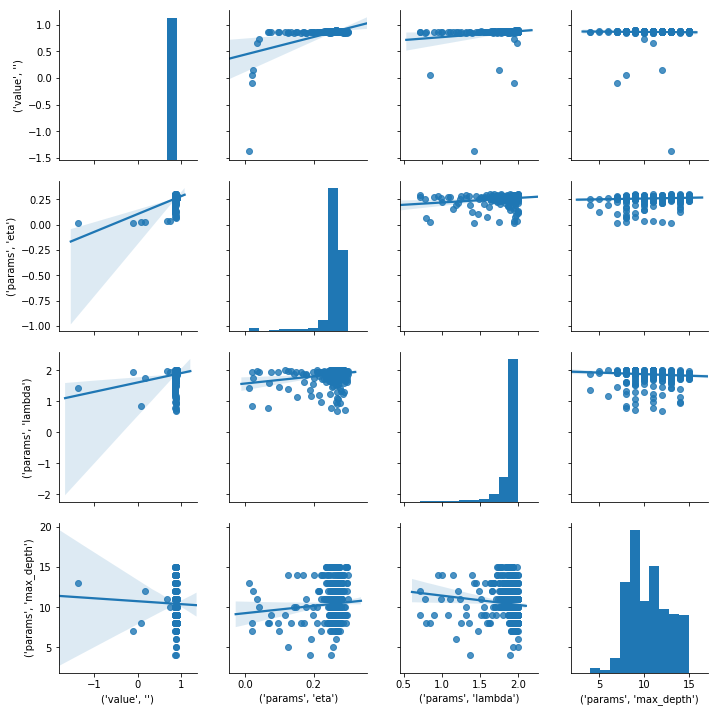

In [9]:
%matplotlib inline
import seaborn as sns

study_df = study.trials_dataframe()[['value', 'params']]
sns.pairplot(study_df, kind='reg')

## 見つけたパラメータでモデル作成

In [10]:
from sklearn.metrics import r2_score

def eval_model(params, trains, tests):
    model = xgb.train(params, trains, num_boost_round=100, verbose_eval=False, evals=watchlist)
    predicts = model.predict(tests)
    r2 = r2_score(test_labels, predicts)
    
    return r2

In [11]:
base_r2 = eval_model(base_params, trains, tests)

merged_params = dict(base_params, **study.best_params)
best_r2 = eval_model(merged_params, trains, tests)

print(f'Base params: {base_params}')
print(f'Best params: {merged_params}')
print(f'Base: {base_r2}, Best: {best_r2}, Diff: {best_r2 - base_r2}')

Base params: {'booster': 'gbtree', 'objective': 'reg:squarederror', 'eval_metric': 'rmse'}
Best params: {'booster': 'gbtree', 'objective': 'reg:squarederror', 'eval_metric': 'rmse', 'eta': 0.2664681335787705, 'max_depth': 9, 'lambda': 1.972044456926823}
Base: 0.8665148681824315, Best: 0.9001419161356026, Diff: 0.03362704795317106
